<a href="https://colab.research.google.com/github/honglynn/nerdyside/blob/master/marketing_banking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# check for the version to avoid any incompatibility between libraries versions and python versions
!python --version

Python 3.11.11


In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
!pip install squarify

In [3]:
import itertools

# data wrangling
import pandas as pd
import numpy as np
#import statistics
#import statsmodels.api as sm
#import scipy.stats as st
#import datetime
#import random
#import re

# Machine Learning Phase
import sklearn
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

#Metrics Phase
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

mpl.style.use('ggplot')
sns.set_style('white')

import warnings
warnings.filterwarnings('ignore')

In [4]:
bank = pd.read_csv('/content/drive/My Drive/marketing_data_analytics/banking/BankDataset.csv')

# use the copied data in case for the need to trace back to the source
df_bank = bank.copy()

In [5]:
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no


In [6]:
# print the info on the dataset
print("There are (rows, columns)" + str(df_bank.shape))
print(df_bank.info())

There are (rows, columns)(41188, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              41188 non-null  int64  
 1   job              41188 non-null  object 
 2   marital          41188 non-null  object 
 3   education        41188 non-null  object 
 4   default          41188 non-null  object 
 5   housing          41188 non-null  object 
 6   loan             41188 non-null  object 
 7   contact          41188 non-null  object 
 8   month            41188 non-null  object 
 9   day_of_week      41188 non-null  object 
 10  duration         41188 non-null  int64  
 11  campaign         41188 non-null  int64  
 12  pdays            41188 non-null  int64  
 13  previous         41188 non-null  int64  
 14  poutcome         41188 non-null  object 
 15  emp.var.rate     41188 non-null  float64
 16  cons.price.idx   4118

In [7]:
df_bank.rename(columns = {"housing": "housing_loan",
                          "loan": "personal_loan",
                          "contact": "contact_type",
                          "month": "last_contact_month",
                          "day_of_week": "last_contact_day",
                          "duration": "last_contact_in_seconds",
                          "campaign": "contact_ct_during_this_campaign",
                          "pdays": "days_since_last_contact",
                          "previous": "contact_ct_before_this_campaign",
                          "poutcome": "previous_outcome",
                          "y": "term_deposit_subscription"}, inplace = True)

In [11]:
df_bank.describe()

,age,last_contact_in_seconds,contact_ct_during_this_campaign,days_since_last_contact,contact_ct_before_this_campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.887597
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.125351
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.250174
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.857484
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.945879
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.959214
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,0.988360


In [ ]:
# get all Column Header Labels as a List. Because sometimes after changing the format from excel to csv, there will be some blank columns popping up.
# when there are many columns, NOT all columns will be shown.
# When a table is too wide, having a quick look at all columns is efficient in terms of deciding which columns to keep.
# detect the white space in column names
# this saves space in output compare the approach below it and shows ALL columns while the other approach may fold some columns because of limited space
print(df_no_loan.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'housing_loan', 'personal_loan', 'contact_type', 'last_contact_month', 'last_contact_day', 'last_contact_in_seconds', 'contact_ct_during_this_campaign', 'days_since_last_contact', 'contact_ct_before_this_campaign', 'previous_outcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'ModelPrediction', 'term_deposit_subscription']


In [ ]:
df_bank.duplicated().sum()

12

In [ ]:
#df_bank[df_bank.duplicated(keep = False)]

In [ ]:
df_bank.drop_duplicates(inplace = True)

In [ ]:
#Checking out the categories and their respective counts in each feature
print("employment:",df_bank.employment.value_counts(),sep = '\n')
print("-"*40)
print("job:",df_bank.job.value_counts(),sep = '\n')
print("-"*40)
print("marital:",df_bank.marital.value_counts(),sep = '\n')
print("-"*40)
print("education:",df_bank.education.value_counts(),sep = '\n')
print("-"*40)
print("default:",df_bank.default.value_counts(),sep = '\n')
print("-"*40)
print("housing_loan:",df_bank.housing_loan.value_counts(),sep = '\n')
print("-"*40)
print("personal_loan:",df_bank.personal_loan.value_counts(),sep = '\n')
print("-"*40)
print("contact_type:",df_bank.contact_type.value_counts(),sep = '\n')
print("-"*40)
print("last_contact_month:",df_bank.last_contact_month.value_counts(),sep = '\n')
print("-"*40)
print("last_contact_day:",df_bank.last_contact_day.value_counts(),sep = '\n')
print("-"*40)
print("previous_outcome:",df_bank.previous_outcome.value_counts(),sep = '\n')
print("-"*40)
print("term_deposit_subscription:",df_bank.term_deposit_subscription.value_counts(),sep = '\n')
print("-"*40)

employment:
employment
employed      37239
retired        1718
unemployed     1014
student         875
unknown         330
Name: count, dtype: int64
----------------------------------------
job:
job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
----------------------------------------
marital:
marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64
----------------------------------------
education:
education
middle.school          12512
university.degree      12164
high.school             9512
professional.course     5240
unknown                 1730
illiterate                18
Name: count, dtype: int64
----------------------------------------
default:
default
no         32577
unknow

In [ ]:
lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    df_bank.loc[df_bank['education'] == i, 'education'] = "middle.school"

In [ ]:
df_bank['last_contact_in_minute'] = (df_bank['last_contact_in_seconds']/60).astype(int).sort_values(ascending=False)

In [ ]:
df_bank['employment'] = df_bank['job'].copy()

In [ ]:
emp_clustering =['admin.','blue-collar','technician', 'services', 'management', 'entrepreneur', 'self-employed', 'housemaid']

for i in emp_clustering:
    df_bank.loc[df_bank['employment'] == i, 'employment'] = "employed"

In [ ]:
# merge similar categories
df_bank['job'] = df_bank['job'].replace('entrepreneur', 'self-employed').replace('housemaid', 'blue-collar').replace('admin.', 'admin')

In [ ]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.2f}% ({v:d})'.format(pct, v=val)
        return my_format

([<matplotlib.patches.Wedge at 0x792ab0318910>,
 [Text(-1.096268477801298, -0.09052858432133395, 'no'),
  Text(1.2955900242281997, 0.10698826627426662, 'yes')],
 [Text(-0.5979646242552534, -0.04937922781163669, '88.73% (36537)'),
  Text(0.7972861687558151, 0.06583893309185637, '11.27% (4639)')])

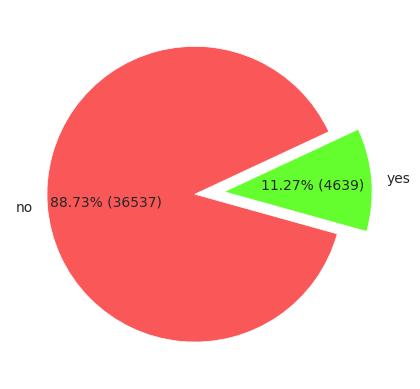

In [ ]:
term_deposit_subscription = df_bank['term_deposit_subscription'].value_counts()
colors = ["#FA5858", "#64FE2E"]
explode = (0, 0.2)
plt.pie(term_deposit_subscription, explode=explode, colors=colors,
        labels = term_deposit_subscription.index, startangle=25, autopct=autopct_format(term_deposit_subscription))

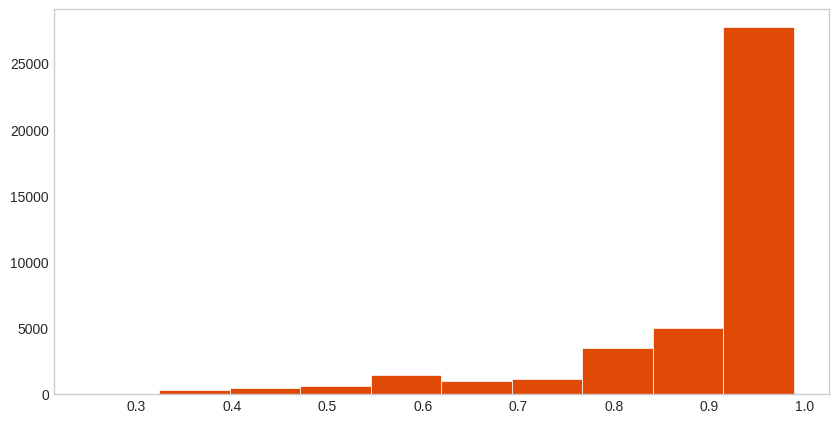

In [ ]:
df_bank['ModelPrediction'].hist(bins=10, #bins=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                figsize=(10, 5), color='#E14906')

# Remove grid lines
plt.grid(False)

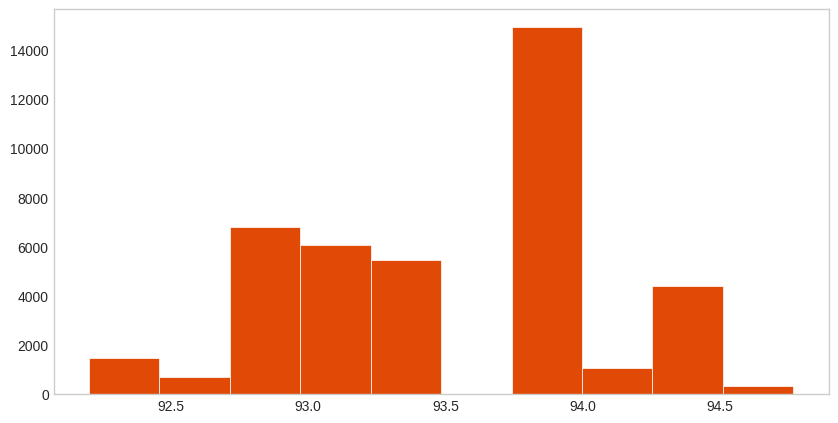

In [ ]:
df_bank['cons.price.idx'].hist(bins=10, #bins=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                figsize=(10, 5), color='#E14906')

# Remove grid lines
plt.grid(False)

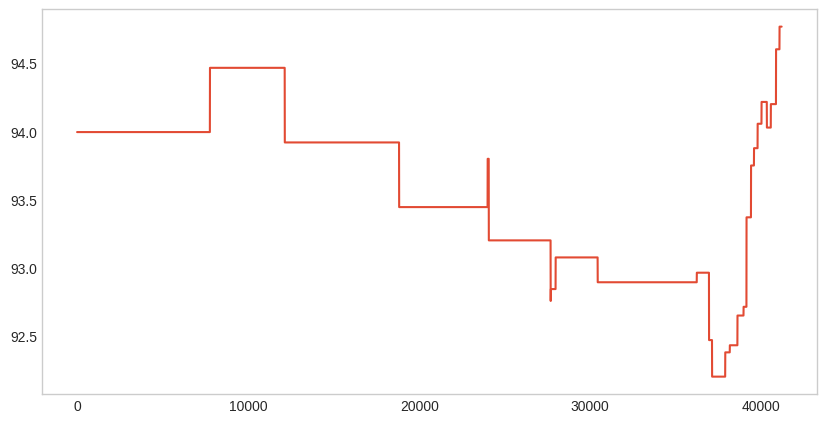

In [ ]:
df_bank['cons.price.idx'].plot( figsize=(10, 5)) # Plots 'col1' against the index

# Remove grid lines
plt.grid(False)

plt.show()

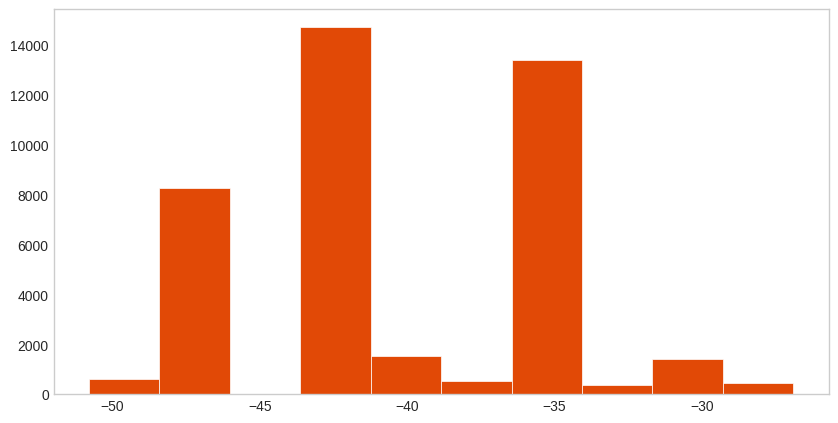

In [ ]:
df_bank['cons.conf.idx'].hist(bins=10, #bins=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                figsize=(10, 5), color='#E14906')

# Remove grid lines
plt.grid(False)

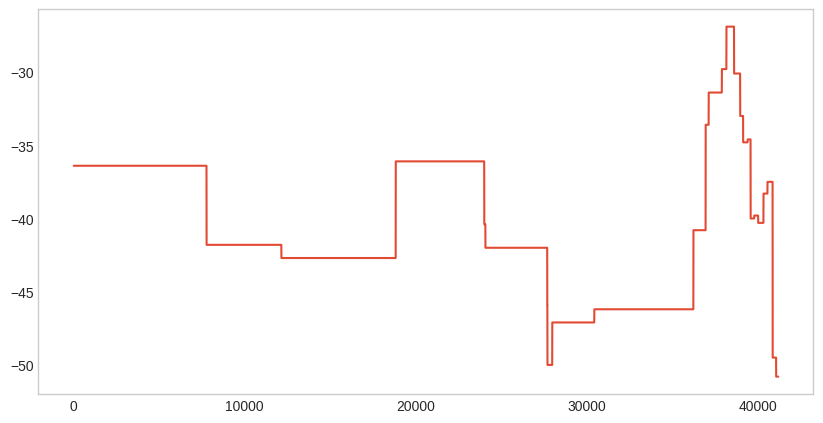

In [ ]:
df_bank['cons.conf.idx'].plot( figsize=(10, 5)) # Plots 'col1' against the index

# Remove grid lines
plt.grid(False)

plt.show()

In [ ]:
df_housing_loans = df_bank[(df_bank['housing_loan'] == 'yes') & (df_bank['personal_loan'] == 'yes')]
df_housing_loans.shape

(3691, 22)

In [ ]:
df_housing_personal_loan = df_bank[(df_bank['housing_loan'] == 'yes') | (df_bank['personal_loan'] == 'yes')]
df_housing_personal_loan.shape

(24128, 22)

In [ ]:
df_no_loan = df_bank[(df_bank['housing_loan'] == 'no') | (df_bank['personal_loan'] == 'no')]
df_no_loan.shape

(36495, 24)

([<matplotlib.patches.Wedge at 0x7ecfd82fc8d0>,
 [Text(-1.0963565932122283, -0.08945513132334344, 'no'),
  Text(1.295694163038093, 0.10571960967112831, 'yes')],
 [Text(-0.5980126872066699, -0.04879370799455096, '88.70% (32372)'),
  Text(0.7973502541772879, 0.06505822133607896, '11.30% (4123)')])

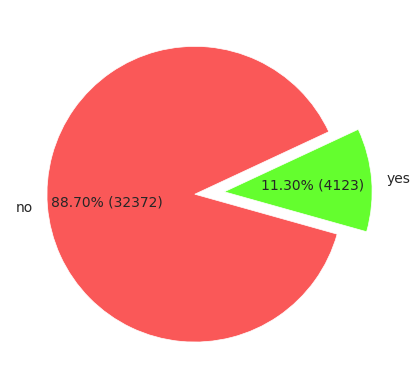

In [ ]:
colors = ["#FA5858", "#64FE2E"]
explode = (0, 0.2)

loan = df_no_loan['term_deposit_subscription'].value_counts()
plt.pie(loan, explode=explode, colors=colors, labels = loan.index, startangle=25, autopct=autopct_format(loan))

In [ ]:
df_detect_logic = pd.concat([df_housing_personal_loans, df_housing_personal_loan])
df_detect_logic.duplicated( ).sum( )

3691

([<matplotlib.patches.Wedge at 0x7ecfd89d48d0>,
 [Text(-1.096970726661294, -0.0815795614611456, 'no'),
  Text(1.2964199564606886, 0.0964121179648389, 'yes')],
 [Text(-0.5983476690879785, -0.04449794261517032, '88.47% (21347)'),
  Text(0.7977968962835007, 0.05933053413220854, '11.53% (2781)')])

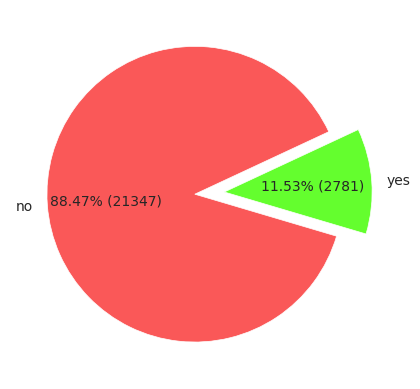

In [ ]:
colors = ["#FA5858", "#64FE2E"]
explode = (0, 0.2)

loan = df_housing_personal_loan['term_deposit_subscription'].value_counts()
plt.pie(loan, explode=explode, colors=colors, labels = loan.index, startangle=25, autopct=autopct_format(loan))

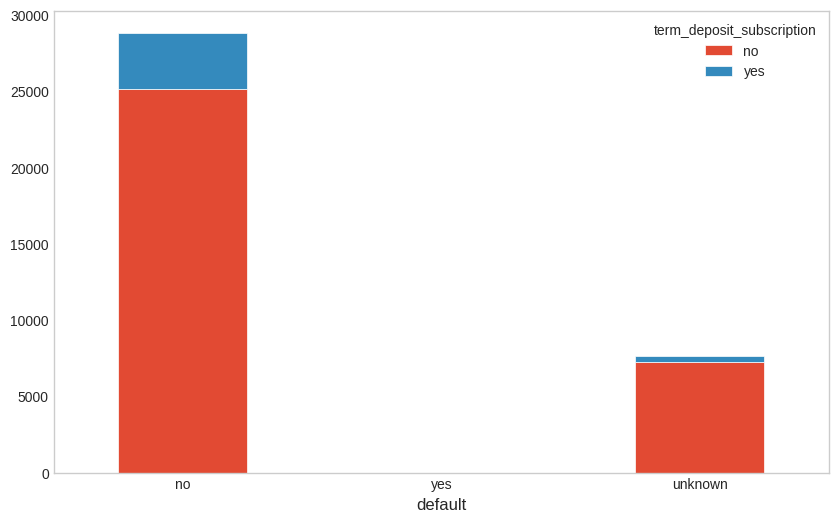

In [ ]:
pd.crosstab(
    df_no_loan['default'],df_no_loan['term_deposit_subscription'],
    rownames=['default'], colnames=['term_deposit_subscription']
    ).loc[['no', 'yes', 'unknown']].plot(kind="bar",stacked=True, figsize=(10, 6), rot=0)

# Remove grid lines
plt.grid(False)

([<matplotlib.patches.Wedge at 0x7ecfd19f77d0>,
 [Text(-0.8700374009523908, 0.6730786885231244, 'no'),
  Text(0.8698635047822708, -0.6733034108393514, 'unknown'),
  Text(1.0999999632807473, -0.0002842223684113975, 'yes')],
 [Text(-0.47456585506494037, 0.36713383010352235, '79.04% (28846)'),
  Text(0.47447100260851127, -0.36725640591237346, '20.95% (7646)'),
  Text(0.5999999799713167, -0.00015503038276985318, '0.01% (3)')])

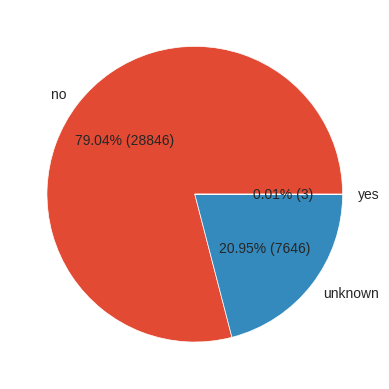

In [ ]:
no_loan_default = df_no_loan['default'].value_counts()
plt.pie(no_loan_default,labels = no_loan_default.index, autopct=autopct_format(no_loan_default))

<Axes: xlabel='job'>

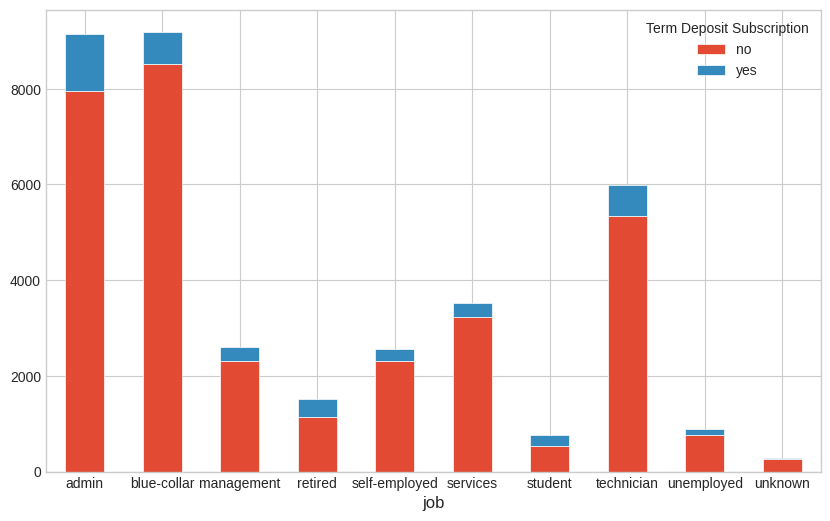

In [ ]:
pd.crosstab(df_no_loan['job'],df_no_loan['term_deposit_subscription'], rownames=['job'], colnames=['Term Deposit Subscription']
           ).plot(
    kind="bar",stacked=True, figsize=(10, 6), rot=0)
#.loc[['married', 'single', 'divorced', 'unknown']]


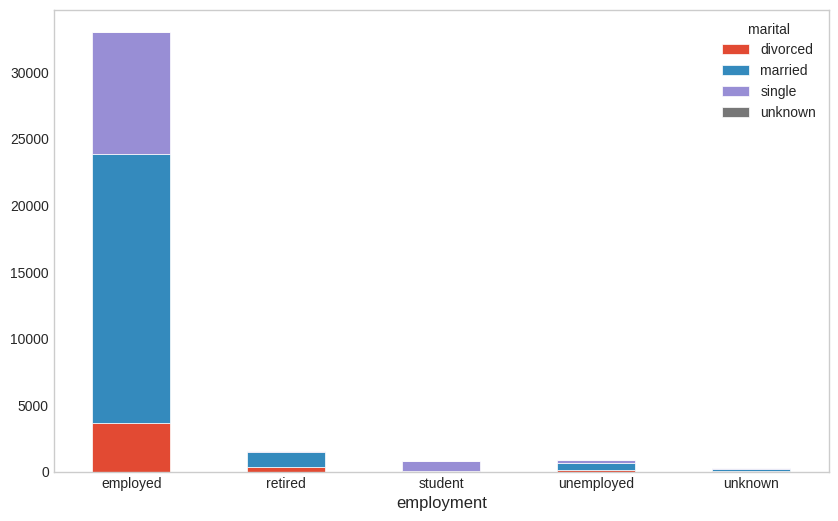

In [ ]:
pd.crosstab(df_no_loan['employment'],df_no_loan['marital'], rownames=['employment'], colnames=['marital']
           ).plot(
    kind="bar",stacked=True, figsize=(10, 6), rot=0)

# Remove grid lines
plt.grid(False)

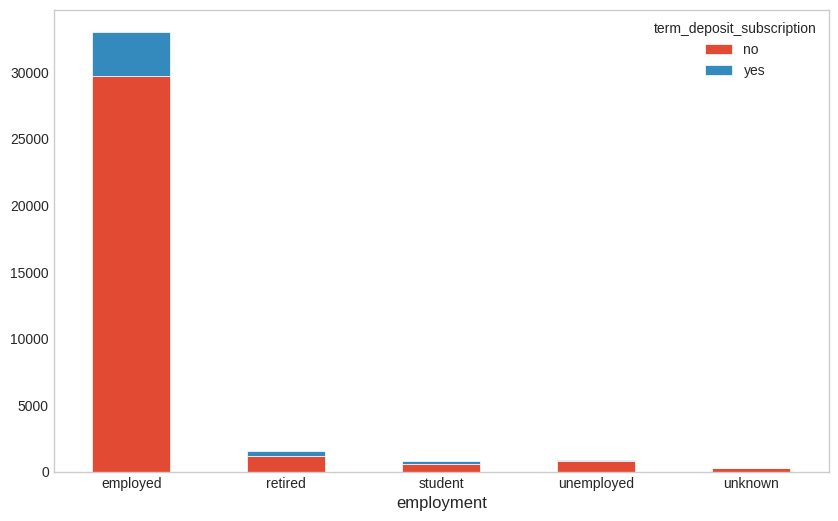

In [ ]:
pd.crosstab(df_no_loan['employment'],df_no_loan['term_deposit_subscription'], rownames=['employment'], colnames=['term_deposit_subscription']
           ).plot(
    kind="bar",stacked=True, figsize=(10, 6), rot=0)

# Remove grid lines
plt.grid(False)

In [ ]:
df_no_loan_emp = df_no_loan[(df_no_loan['employment'] == 'employed')]
df_no_loan_emp.shape

(33023, 24)

([<matplotlib.patches.Wedge at 0x7ecfc823c8d0>,
 [Text(-1.0923116361481655, -0.12982792278750352, 'no'),
  Text(1.2909137482201096, 0.1534330298739758, 'yes')],
 [Text(-0.5958063469899083, -0.07081523061136555, '89.88% (29680)'),
  Text(0.7944084604431442, 0.0944203260762928, '10.12% (3343)')])

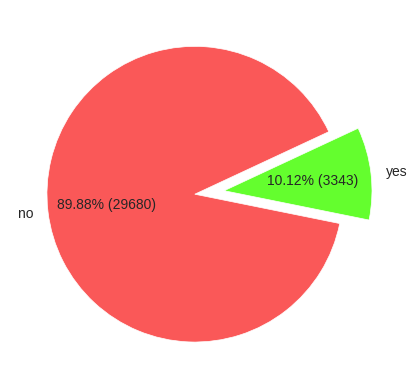

In [ ]:
colors = ["#FA5858", "#64FE2E"]
explode = (0, 0.2)

loan_emp = df_no_loan_emp['term_deposit_subscription'].value_counts()
plt.pie(loan_emp, explode=explode, colors=colors, labels = loan_emp.index, startangle=25, autopct=autopct_format(loan_emp))

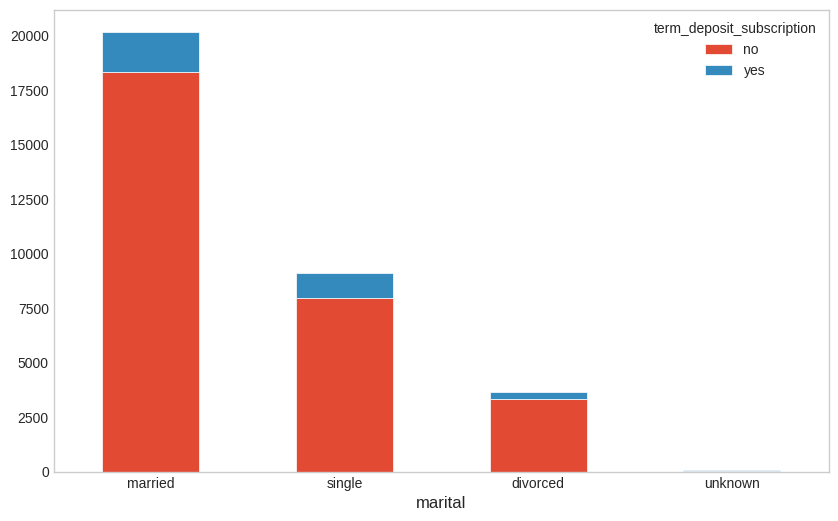

In [ ]:
pd.crosstab(
    df_no_loan_emp['marital'],df_no_loan_emp['term_deposit_subscription'],
    rownames=['marital'], colnames=['term_deposit_subscription']
    ).loc[['married', 'single', 'divorced', 'unknown']].plot(kind="bar",stacked=True, figsize=(10, 6), rot=0)

# Remove grid lines
plt.grid(False)

([<matplotlib.patches.Wedge at 0x7ecfc7b47750>,
 [Text(-0.3762494275326132, 1.0336519570345626, 'married'),
  Text(-0.0046568592714198885, -1.099990142529344, 'single'),
  Text(1.0300808772352683, -0.3859188857185153, 'divorced'),
  Text(1.0999854845190074, -0.005651004112943347, 'unknown')],
 [Text(-0.20522696047233444, 0.5638101583824886, '61.11% (20181)'),
  Text(-0.002540105057138121, -0.5999946231978239, '27.64% (9128)'),
  Text(0.5618622966737826, -0.2105012103919174, '11.08% (3660)'),
  Text(0.5999920824649131, -0.0030823658797872796, '0.16% (54)')])

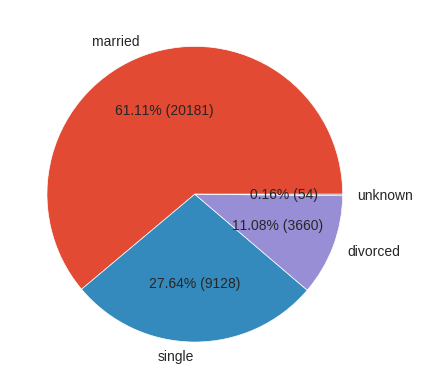

In [ ]:
no_loan_emp_marital = df_no_loan_emp['marital'].value_counts()
plt.pie(no_loan_emp_marital,labels = no_loan_emp_marital.index, autopct=autopct_format(no_loan_emp_marital))

In [ ]:
print("employment:",df_no_loan.employment.value_counts(),sep = '\n')
print("-"*40)

employment:
employment
employed      33023
retired        1519
unemployed      892
student         768
unknown         293
Name: count, dtype: int64
----------------------------------------


In [ ]:
df_no_loan_emp_single = df_no_loan_emp[(df_no_loan_emp['marital'] == 'single')]
df_no_loan_emp_single.shape

(9128, 24)

([<matplotlib.patches.Wedge at 0x7ecfc760d8d0>,
 [Text(-1.0923116361481655, -0.12982792278750352, 'no'),
  Text(1.2909137482201096, 0.1534330298739758, 'yes')],
 [Text(-0.5958063469899083, -0.07081523061136555, '89.88% (29680)'),
  Text(0.7944084604431442, 0.0944203260762928, '10.12% (3343)')])

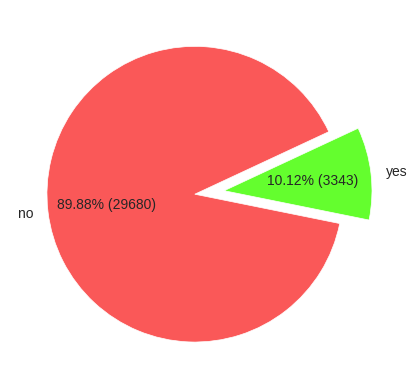

In [ ]:
colors = ["#FA5858", "#64FE2E"]
explode = (0, 0.2)

loan_emp_single = df_no_loan_emp['term_deposit_subscription'].value_counts()
plt.pie(loan_emp_single, explode=explode, colors=colors, labels = loan_emp_single.index, startangle=25, autopct=autopct_format(loan_emp_single))

In [ ]:
df_no_loan_emp_married = df_no_loan_emp[(df_no_loan_emp['marital'] == 'married')]
df_no_loan_emp_married.shape

(20181, 24)

([<matplotlib.patches.Wedge at 0x7ecfc7446f90>,
 [Text(-1.0878940115195357, -0.1627471035070443, 'no'),
  Text(1.285692904696965, 0.1923376063381284, 'yes')],
 [Text(-0.5933967335561102, -0.08877114736747871, '90.84% (18332)'),
  Text(0.7911956336596708, 0.11836160390038669, '9.16% (1849)')])

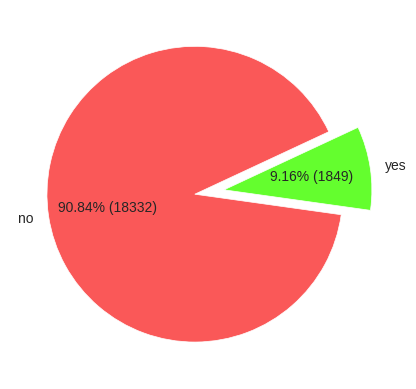

In [ ]:
colors = ["#FA5858", "#64FE2E"]
explode = (0, 0.2)

loan_emp_married = df_no_loan_emp_married['term_deposit_subscription'].value_counts()
plt.pie(loan_emp_married, explode=explode, colors=colors, labels = loan_emp_married.index, startangle=25, autopct=autopct_format(loan_emp_married))

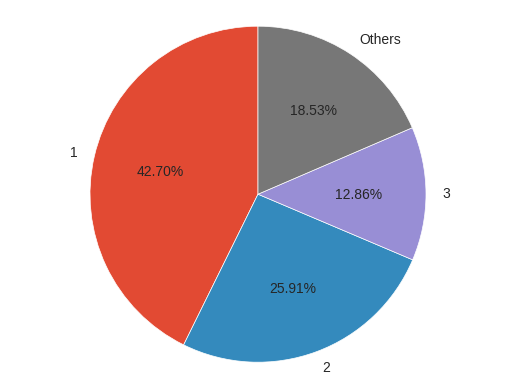

In [ ]:
contact_ct = df_no_loan_emp_single['contact_ct_during_this_campaign'].value_counts()
contact_ct = contact_ct.reset_index()
contact_ct.columns = ['contact_ct_during_this_campaign', 'count']

# Sort the DataFrame by value in descending order
contact_ct = contact_ct.sort_values(by='count', ascending=False)

# Select the top 3 categories and sum the rest
top_3 = contact_ct.head(3)
others_value = contact_ct['count'][3:].sum()

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({'contact_ct_during_this_campaign': top_3['contact_ct_during_this_campaign'].tolist() + ['Others'],
                          'count': top_3['count'].tolist() + [others_value]})

#plot_data

# Create the pie chart
plt.pie(plot_data['count'], labels=plot_data['contact_ct_during_this_campaign'], autopct='%1.2f%%', startangle=90)
#plt.title('Top 3 Categories and Others')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

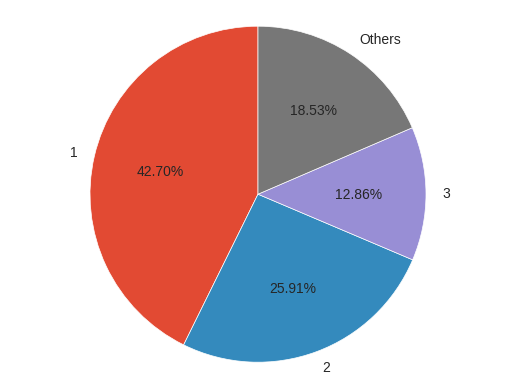

In [ ]:
contact_ct = df_no_loan_emp_single['contact_ct_during_this_campaign'].value_counts()
contact_ct = contact_ct.reset_index()
contact_ct.columns = ['contact_ct_during_this_campaign', 'count']

# Sort the DataFrame by value in descending order
contact_ct = contact_ct.sort_values(by='count', ascending=False)

# Select the top 3 categories and sum the rest
top_3 = contact_ct.head(3)
others_value = contact_ct['count'][3:].sum()

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({'contact_ct_during_this_campaign': top_3['contact_ct_during_this_campaign'].tolist() + ['Others'],
                          'count': top_3['count'].tolist() + [others_value]})

#plot_data

# Create the pie chart
plt.pie(plot_data['count'], labels=plot_data['contact_ct_during_this_campaign'], autopct='%1.2f%%', startangle=90)
#plt.title('Top 3 Categories and Others')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

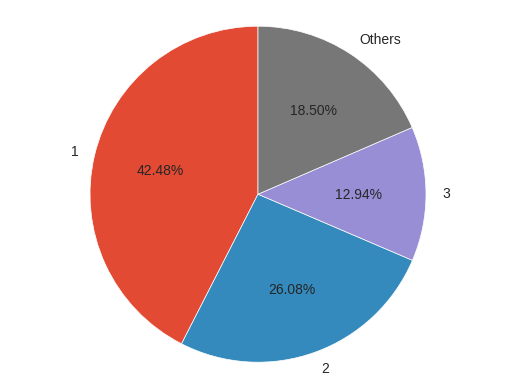

In [ ]:
contact_ct = df_no_loan_emp_married['contact_ct_during_this_campaign'].value_counts()
contact_ct = contact_ct.reset_index()
contact_ct.columns = ['contact_ct_during_this_campaign', 'count']

# Sort the DataFrame by value in descending order
contact_ct = contact_ct.sort_values(by='count', ascending=False)

# Select the top 3 categories and sum the rest
top_3 = contact_ct.head(3)
others_value = contact_ct['count'][3:].sum()

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({'contact_ct_during_this_campaign': top_3['contact_ct_during_this_campaign'].tolist() + ['Others'],
                          'count': top_3['count'].tolist() + [others_value]})

#plot_data

# Create the pie chart
plt.pie(plot_data['count'], labels=plot_data['contact_ct_during_this_campaign'], autopct='%1.2f%%', startangle=90)
#plt.title('Top 3 Categories and Others')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

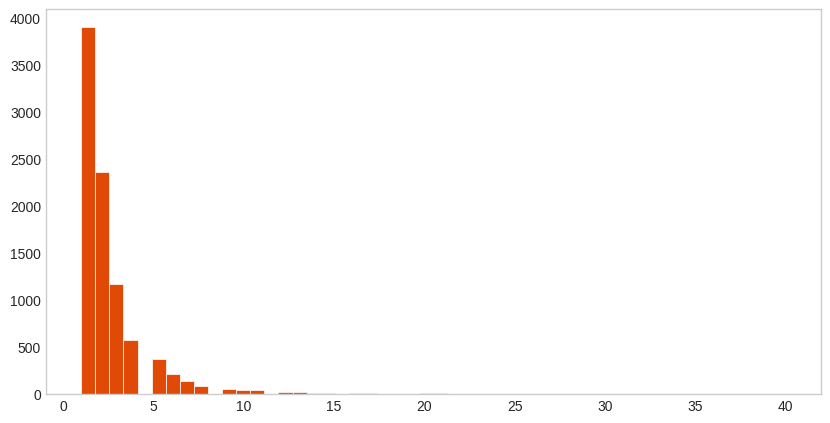

In [ ]:
df_no_loan_emp_single['contact_ct_during_this_campaign'].hist(bins=50, figsize=(10,5), color='#E14906')
# Remove grid lines
plt.grid(False)

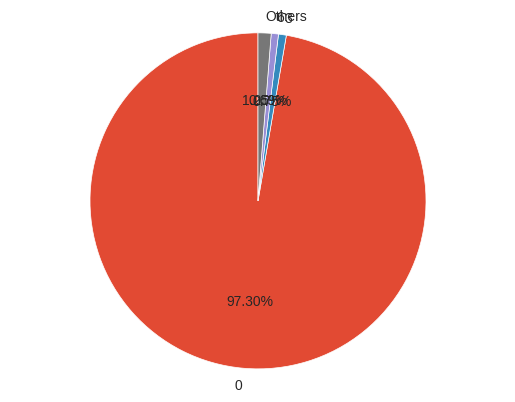

In [ ]:
contact_ct = df_no_loan_emp_married['days_since_last_contact'].value_counts()
contact_ct = contact_ct.reset_index()
contact_ct.columns = ['days_since_last_contact', 'count']

# Sort the DataFrame by value in descending order
contact_ct = contact_ct.sort_values(by='count', ascending=False)

# Select the top 3 categories and sum the rest
top_3 = contact_ct.head(3)
others_value = contact_ct['count'][3:].sum()

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({'days_since_last_contact': top_3['days_since_last_contact'].tolist() + ['Others'],
                          'count': top_3['count'].tolist() + [others_value]})

#plot_data

# Create the pie chart
plt.pie(plot_data['count'], labels=plot_data['days_since_last_contact'], autopct='%1.2f%%', startangle=90)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

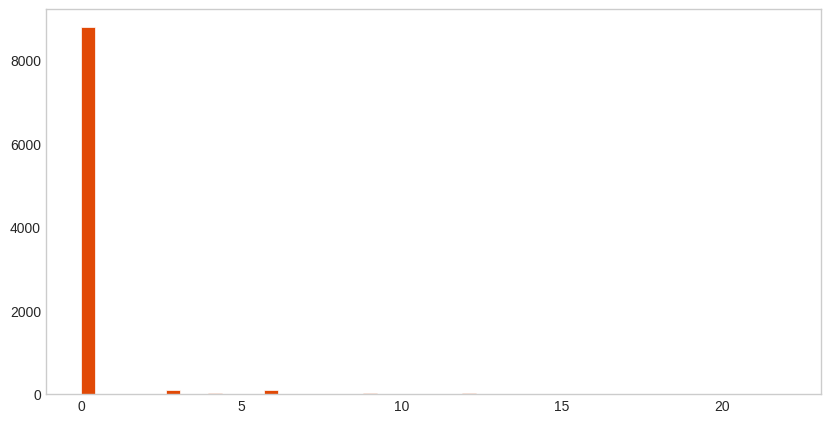

In [ ]:
df_no_loan_emp_single['days_since_last_contact'].hist(bins=50, figsize=(10,5), color='#E14906')
# Remove grid lines
plt.grid(False)

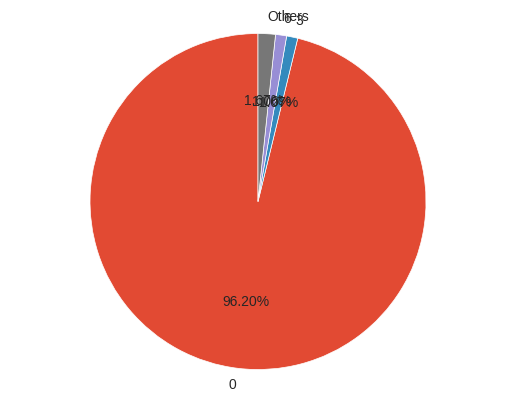

In [ ]:
contact_ct = df_no_loan_emp_single['days_since_last_contact'].value_counts()
contact_ct = contact_ct.reset_index()
contact_ct.columns = ['days_since_last_contact', 'count']

# Sort the DataFrame by value in descending order
contact_ct = contact_ct.sort_values(by='count', ascending=False)

# Select the top 3 categories and sum the rest
top_3 = contact_ct.head(3)
others_value = contact_ct['count'][3:].sum()

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({'days_since_last_contact': top_3['days_since_last_contact'].tolist() + ['Others'],
                          'count': top_3['count'].tolist() + [others_value]})

#plot_data

# Create the pie chart
plt.pie(plot_data['count'], labels=plot_data['days_since_last_contact'], autopct='%1.2f%%', startangle=90)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

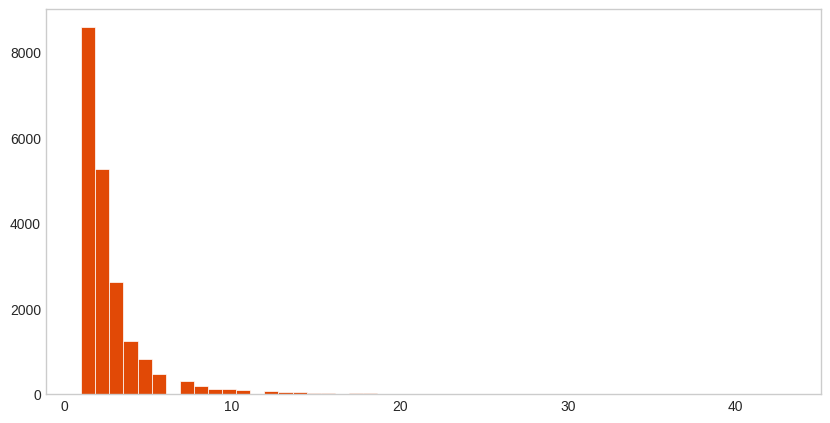

In [ ]:
df_no_loan_emp_married['contact_ct_during_this_campaign'].hist(bins=50, figsize=(10,5), color='#E14906')
# Remove grid lines
plt.grid(False)

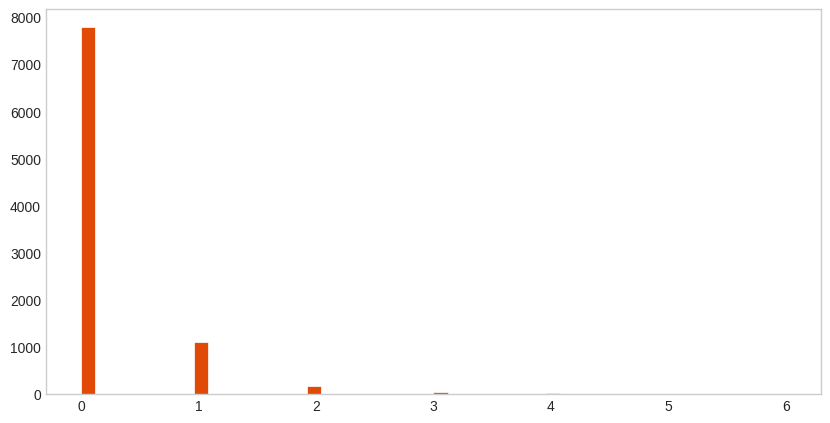

In [ ]:
df_no_loan_emp_single['contact_ct_before_this_campaign'].hist(bins=50, figsize=(10,5), color='#E14906')
# Remove grid lines
plt.grid(False)

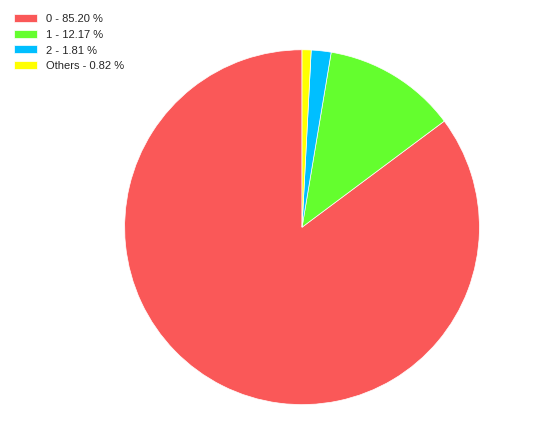

In [ ]:
contact_ct = df_no_loan_emp_single['contact_ct_before_this_campaign'].value_counts()
contact_ct = contact_ct.reset_index()
contact_ct.columns = ['contact_ct_before_this_campaign', 'count']

# Sort the DataFrame by value in descending order
contact_ct = contact_ct.sort_values(by='count', ascending=False)

# Select the top 3 categories and sum the rest
top_3 = contact_ct.head(3)
others_value = contact_ct['count'][3:].sum()

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({'contact_ct_before_this_campaign': top_3['contact_ct_before_this_campaign'].tolist() + ['Others'],
                          'count': top_3['count'].tolist() + [others_value]})

#plot_data

# Create the pie chart
plt.pie(plot_data['count'])

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Assuming 'y' should represent the 'count' column in 'plot_data' and 'x' should represent the 'contact_ct_before_this_campaign' column
y = plot_data['count']  # Assign data to 'y'
x = plot_data['contact_ct_before_this_campaign']  # Assign data to 'x', if needed for labels

# Define colors if not already defined
colors = ['#FA5858', '#64FE2E', '#00BFFF', '#FFFF00']  # Example colors

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)

# Calculate percentages for labels
porcent = 100.*y/y.sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))


plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

plt.savefig('piechart.png', bbox_inches='tight')


#plt.show()

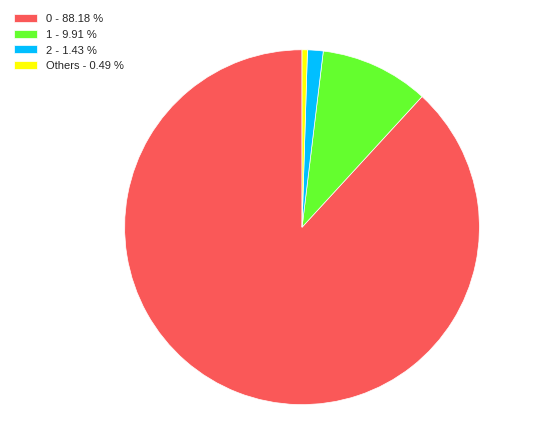

In [ ]:
contact_ct = df_no_loan_emp_married['contact_ct_before_this_campaign'].value_counts()
contact_ct = contact_ct.reset_index()
contact_ct.columns = ['contact_ct_before_this_campaign', 'count']

# Sort the DataFrame by value in descending order
contact_ct = contact_ct.sort_values(by='count', ascending=False)

# Select the top 3 categories and sum the rest
top_3 = contact_ct.head(3)
others_value = contact_ct['count'][3:].sum()

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({'contact_ct_before_this_campaign': top_3['contact_ct_before_this_campaign'].tolist() + ['Others'],
                          'count': top_3['count'].tolist() + [others_value]})

#plot_data

# Create the pie chart
plt.pie(plot_data['count'])

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Assuming 'y' should represent the 'count' column in 'plot_data' and 'x' should represent the 'contact_ct_before_this_campaign' column
y = plot_data['count']  # Assign data to 'y'
x = plot_data['contact_ct_before_this_campaign']  # Assign data to 'x', if needed for labels

# Define colors if not already defined
colors = ['#FA5858', '#64FE2E', '#00BFFF', '#FFFF00']  # Example colors

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)

# Calculate percentages for labels
porcent = 100.*y/y.sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))


plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

plt.savefig('piechart.png', bbox_inches='tight')


#plt.show()

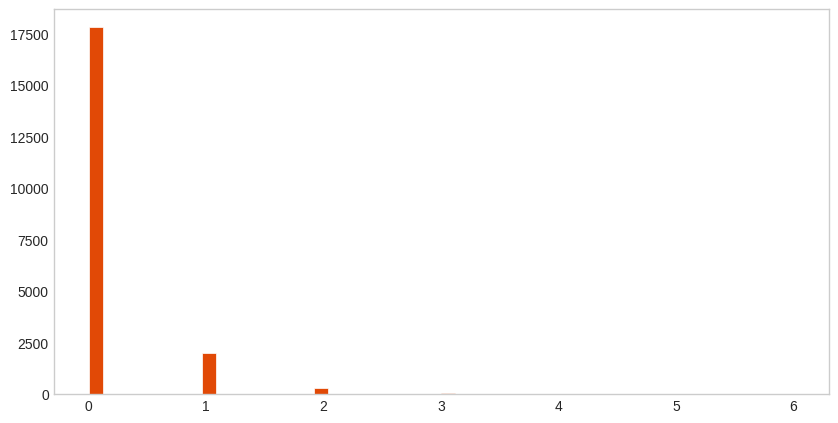

In [ ]:
df_no_loan_emp_married['contact_ct_before_this_campaign'].hist(bins=50, figsize=(10,5), color='#E14906')
# Remove grid lines
plt.grid(False)

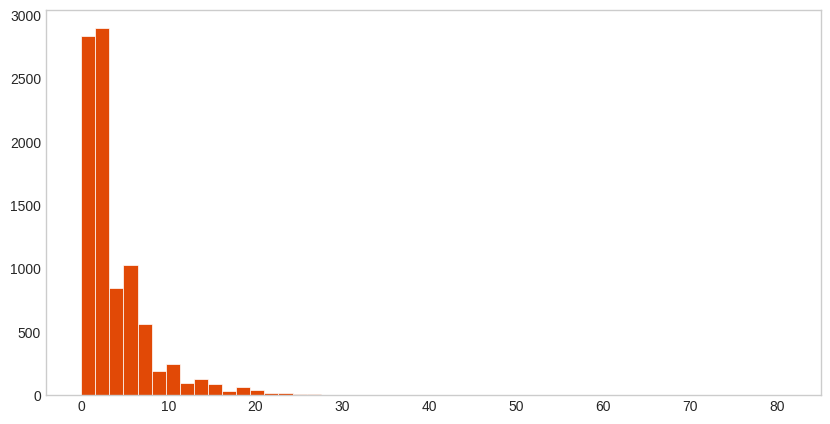

In [ ]:
df_no_loan_emp_single['last_contact_in_minute'].hist(bins=50, figsize=(10,5), color='#E14906')
# Remove grid lines
plt.grid(False)

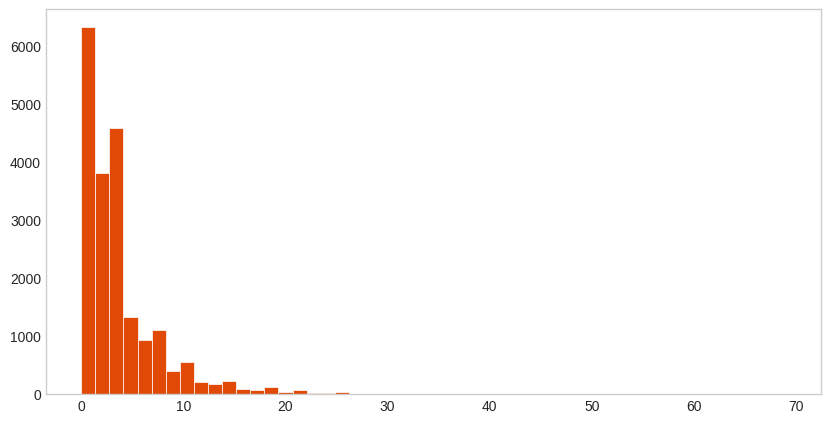

In [ ]:
df_no_loan_emp_married['last_contact_in_minute'].hist(bins=50, figsize=(10,5), color='#E14906')
# Remove grid lines
plt.grid(False)

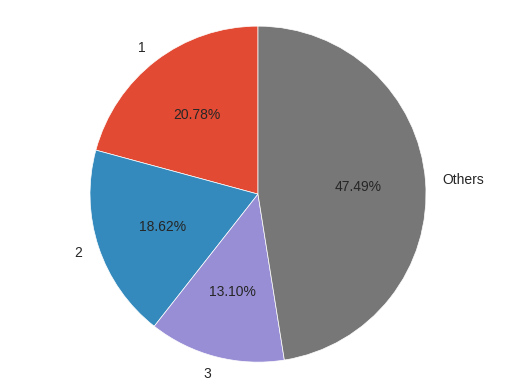

In [ ]:
contact_ct = df_no_loan_emp_single['last_contact_in_minute'].value_counts()
contact_ct = contact_ct.reset_index()
contact_ct.columns = ['last_contact_in_minute', 'count']

# Sort the DataFrame by value in descending order
contact_ct = contact_ct.sort_values(by='count', ascending=False)

# Select the top 3 categories and sum the rest
top_3 = contact_ct.head(3)
others_value = contact_ct['count'][3:].sum()

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({'last_contact_in_minute': top_3['last_contact_in_minute'].tolist() + ['Others'],
                          'count': top_3['count'].tolist() + [others_value]})

#plot_data

# Create the pie chart
plt.pie(plot_data['count'], labels=plot_data['last_contact_in_minute'], autopct='%1.2f%%', startangle=90)
#plt.title('Top 3 Categories and Others')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

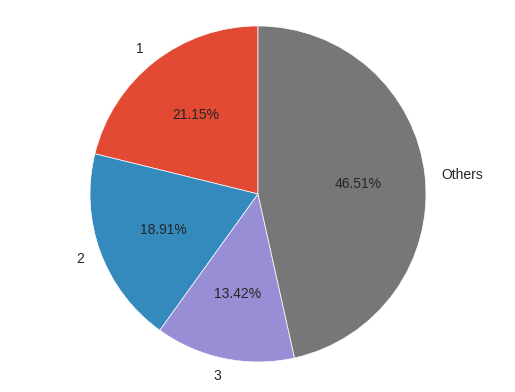

In [ ]:
contact_ct = df_no_loan_emp_married['last_contact_in_minute'].value_counts()
contact_ct = contact_ct.reset_index()
contact_ct.columns = ['last_contact_in_minute', 'count']

# Sort the DataFrame by value in descending order
contact_ct = contact_ct.sort_values(by='count', ascending=False)

# Select the top 3 categories and sum the rest
top_3 = contact_ct.head(3)
others_value = contact_ct['count'][3:].sum()

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({'last_contact_in_minute': top_3['last_contact_in_minute'].tolist() + ['Others'],
                          'count': top_3['count'].tolist() + [others_value]})

#plot_data

# Create the pie chart
plt.pie(plot_data['count'], labels=plot_data['last_contact_in_minute'], autopct='%1.2f%%', startangle=90)
#plt.title('Top 3 Categories and Others')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

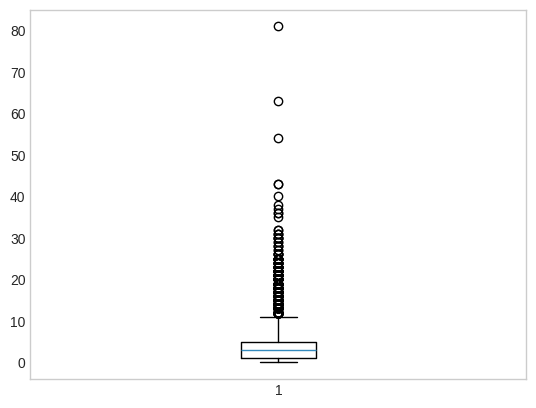

In [ ]:
plt.boxplot(df_no_loan_emp_single['last_contact_in_minute'])
# Remove grid lines
plt.grid(False)
#ax.set_title('ModelPrediction')

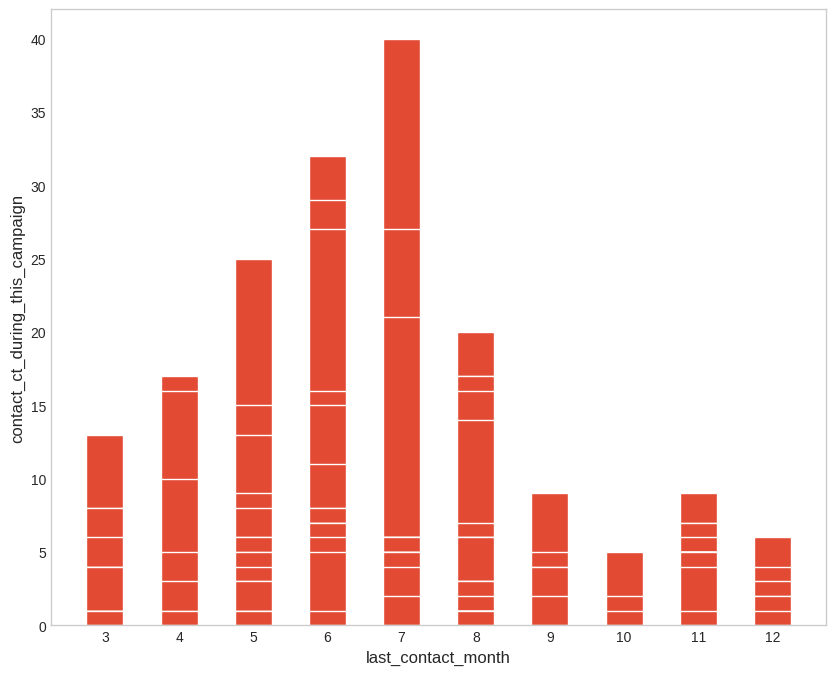

In [ ]:
# Create the figure and axes with desired size
fig, ax = plt.subplots(figsize=(10, 8))

plt.bar(df_no_loan_emp_single['last_contact_month'], df_no_loan_emp_single['contact_ct_during_this_campaign'], width=0.5, linewidth=1)

plt.xlabel("last_contact_month")
plt.ylabel("contact_ct_during_this_campaign")

# Remove grid lines
plt.grid(False)

# Set x ticks to be all unique values in 'last_contact_month' column
ax.set_xticks(df_bank['last_contact_month'].unique())

# Display the plot
plt.show()

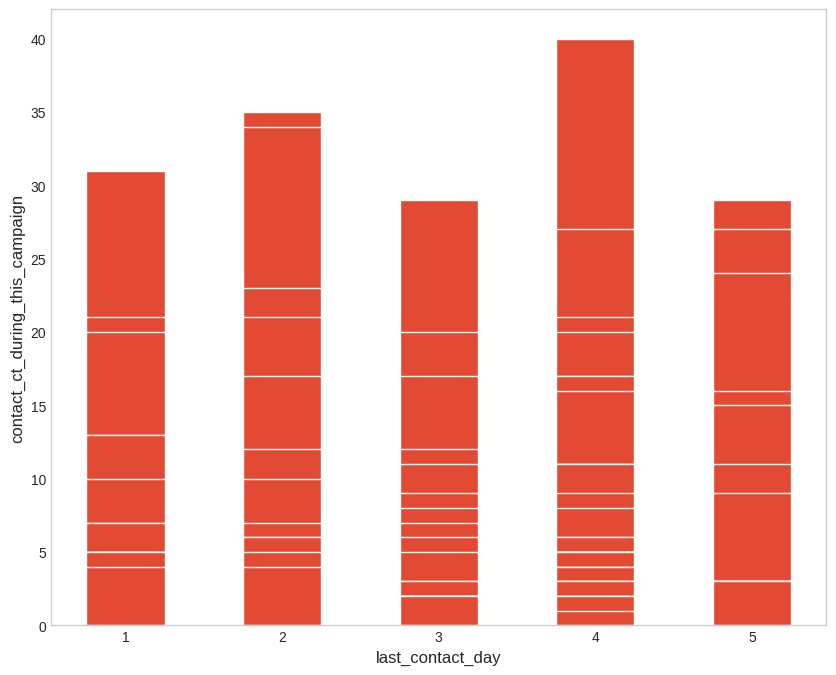

In [ ]:
# Create the figure and axes with desired size
fig, ax = plt.subplots(figsize=(10, 8))

plt.bar(df_no_loan_emp_single['last_contact_day'], df_no_loan_emp_single['contact_ct_during_this_campaign'], width=0.5, linewidth=1)

plt.xlabel("last_contact_day")
plt.ylabel("contact_ct_during_this_campaign")

# Remove grid lines
plt.grid(False)

# Set x ticks to be all unique values in 'last_contact_month' column
ax.set_xticks(df_no_loan_emp_single['last_contact_day'].unique())

# Display the plot
plt.show()

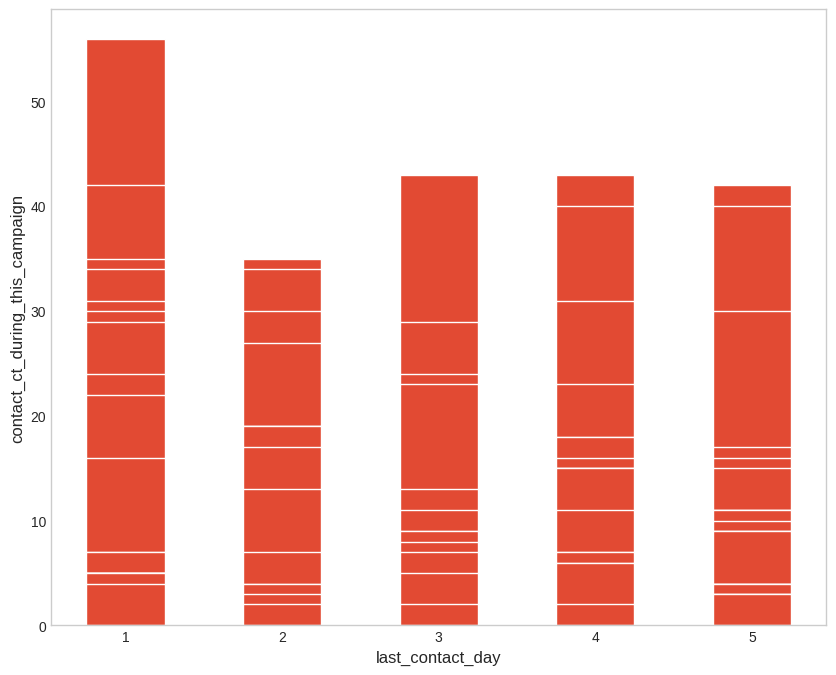

In [ ]:
# Create the figure and axes with desired size
fig, ax = plt.subplots(figsize=(10, 8))

plt.bar(df_bank['last_contact_day'], df_bank['contact_ct_during_this_campaign'], width=0.5, linewidth=1)

plt.xlabel("last_contact_day")
plt.ylabel("contact_ct_during_this_campaign")

# Remove grid lines
plt.grid(False)

# Set x ticks to be all unique values in 'last_contact_month' column
ax.set_xticks(df_bank['last_contact_day'].unique())

# Display the plot
plt.show()

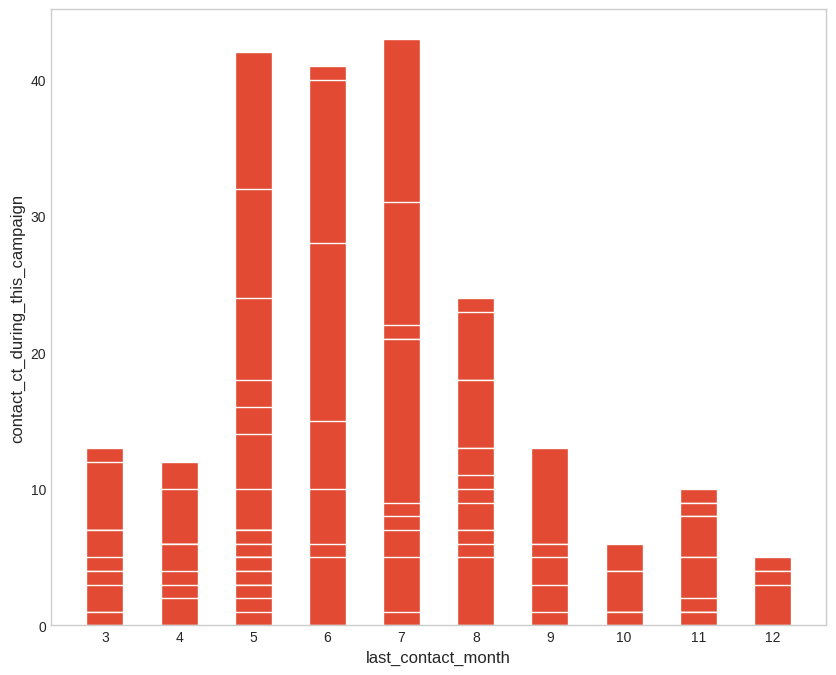

In [ ]:
# Create the figure and axes with desired size
fig, ax = plt.subplots(figsize=(10, 8))

plt.bar(df_no_loan_emp_married['last_contact_month'], df_no_loan_emp_married['contact_ct_during_this_campaign'], width=0.5, linewidth=1)

plt.xlabel("last_contact_month")
plt.ylabel("contact_ct_during_this_campaign")

# Remove grid lines
plt.grid(False)

# Set x ticks to be all unique values in 'last_contact_month' column
ax.set_xticks(df_bank['last_contact_month'].unique())

# Display the plot
plt.show()

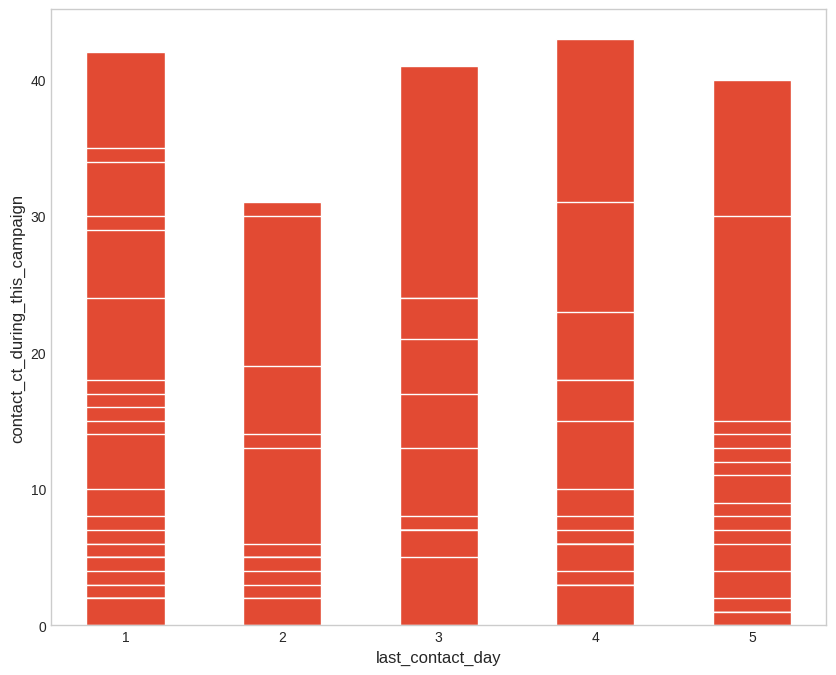

In [ ]:
# Create the figure and axes with desired size
fig, ax = plt.subplots(figsize=(10, 8))

plt.bar(df_no_loan_emp_married['last_contact_day'], df_no_loan_emp_married['contact_ct_during_this_campaign'], width=0.5, linewidth=1)

plt.xlabel("last_contact_day")
plt.ylabel("contact_ct_during_this_campaign")

# Remove grid lines
plt.grid(False)

# Set x ticks to be all unique values in 'last_contact_month' column
ax.set_xticks(df_no_loan_emp_married['last_contact_day'].unique())

# Display the plot
plt.show()

<Axes: xlabel='Housing Loan'>

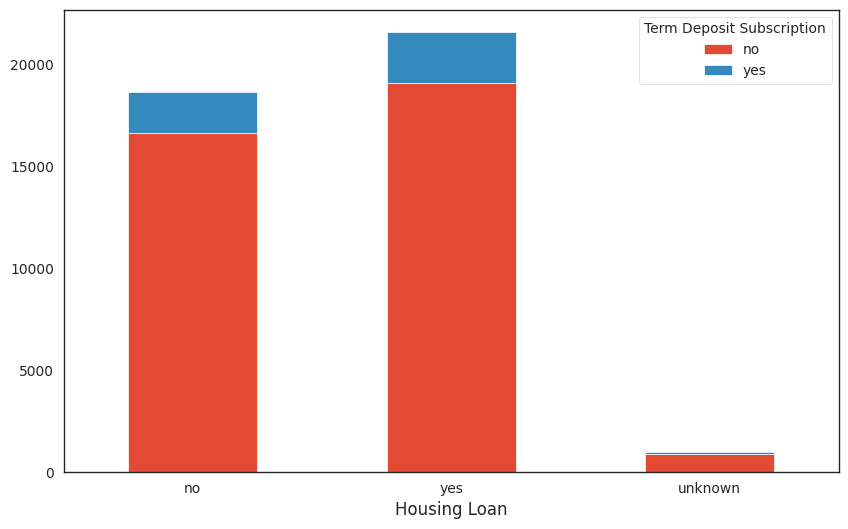

In [ ]:
pd.crosstab(df_bank['housing_loan'],df_bank['term_deposit_subscription'], rownames=['Housing Loan'], colnames=['Term Deposit Subscription']
           ).loc[['no', 'yes', 'unknown']].plot(
    kind="bar",stacked=True, figsize=(10, 6), rot=0)

In [ ]:
df_no_loan.head()

,age,job,marital,education,default,housing_loan,personal_loan,contact_type,last_contact_month,last_contact_day,...,days_since_last_contact,contact_ct_before_this_campaign,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,term_deposit_subscription
0,56,blue-collar,married,middle.school,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin,married,middle.school,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no


<Axes: xlabel=' Personal Loan'>

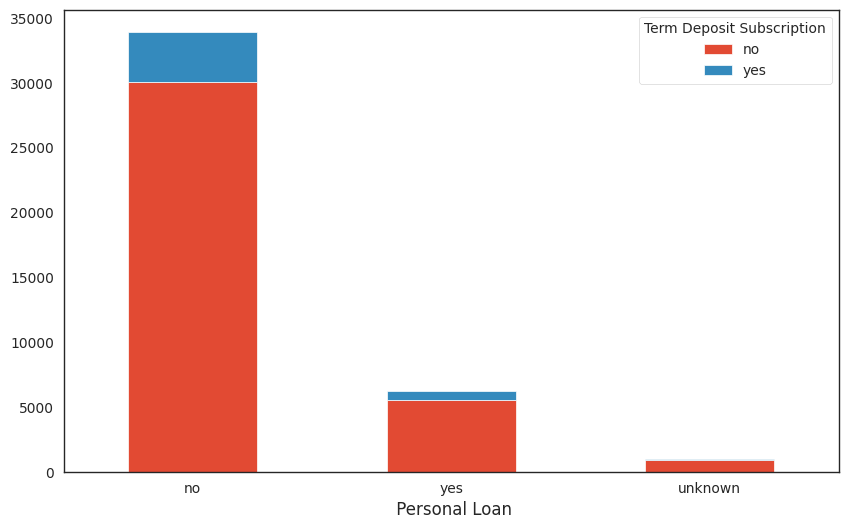

In [ ]:
pd.crosstab(df_bank['personal_loan'],df_bank['term_deposit_subscription'], rownames=[' Personal Loan'], colnames=['Term Deposit Subscription']
           ).loc[['no', 'yes', 'unknown']].plot(
    kind="bar",stacked=True, figsize=(10, 6), rot=0)

([<matplotlib.patches.Wedge at 0x7ecfd8dad150>,
 [Text(-1.0957230171334837, -0.09690753182232731, 'no'),
  Text(1.2949453919271228, 0.1145269921315971, 'yes')],
 [Text(-0.5976671002546274, -0.05285865372126943, '88.92% (3282)'),
  Text(0.7968894719551524, 0.07047814900405976, '11.08% (409)')])

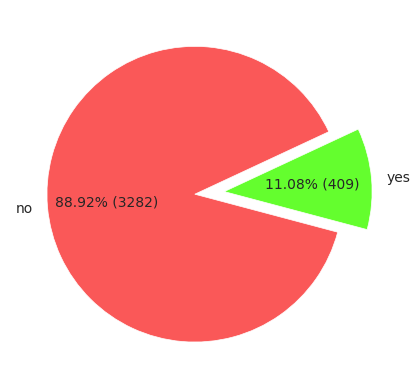

In [ ]:
colors = ["#FA5858", "#64FE2E"]
explode = (0, 0.2)

loan = df_housing_personal_loans['term_deposit_subscription'].value_counts()
plt.pie(loan, explode=explode, colors=colors, labels = loan.index, startangle=25, autopct=autopct_format(loan))

In [ ]:
df_housing_personal_loan_subscribed = df_housing_personal_loan[df_housing_personal_loan['term_deposit_subscription'] == 'yes']
df_housing_personal_loan_subscribed.shape

(409, 22)

In [ ]:
# Filter by string column
df_bank_subscribed = df_bank[df_bank['term_deposit_subscription'] == 'yes']

In [ ]:
s = df_bank_subscribed['education'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))

([<matplotlib.patches.Wedge at 0x792aaa4ac550>,
 [Text(0.6357070186169, 0.8977062918801519, 'middle.school'),
  Text(-1.0494720979068108, 0.32955775778318036, 'university.degree'),
  Text(-0.2414054579638932, -1.0731837703139397, 'high.school'),
  Text(0.8645703363665921, -0.6800868573020346, 'professional.course'),
  Text(1.0900299223073024, -0.14776592460623716, 'unknown'),
  Text(1.0999989626289848, -0.001510700220995265, 'illiterate')],
 [Text(0.34674928288194545, 0.4896579773891737, '30.39% (12512)'),
  Text(-0.5724393261309877, 0.17975877697264384, '29.54% (12164)'),
  Text(-0.13167570434394174, -0.5853729656257852, '23.10% (9512)'),
  Text(0.4715838198363229, -0.3709564676192916, '12.73% (5240)'),
  Text(0.5945617758039831, -0.08059959523976572, '4.20% (1730)'),
  Text(0.5999994341612643, -0.0008240183023610536, '0.04% (18)')])

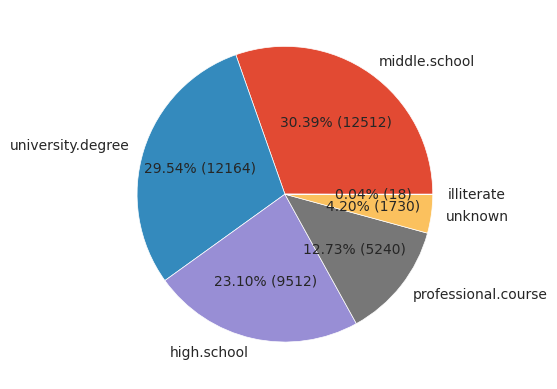

In [ ]:
S = df_bank['education'].value_counts()
plt.pie(S,labels = S.index, autopct=autopct_format(S))

([<matplotlib.patches.Wedge at 0x792ab0107750>,
 [Text(-0.1570154963225802, 1.088736025818276, 'married'),
  Text(-0.20477298791798956, -1.0807719571765078, 'single'),
  Text(1.037540206755007, -0.3653906394077133, 'divorced'),
  Text(1.0999636766713894, -0.00893923954032092, 'unknown')],
 [Text(-0.08564481617595282, 0.593856014082696, '54.6% (2531)'),
  Text(-0.11169435704617613, -0.5895119766417314, '34.9% (1620)'),
  Text(0.5659310218663673, -0.19930398513147998, '10.3% (476)'),
  Text(0.5999801872753032, -0.0048759488401750465, '0.3% (12)')])

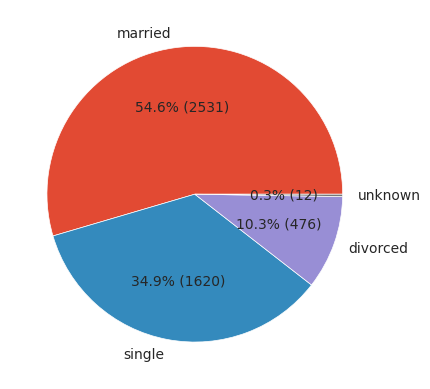

In [ ]:
m = df_bank_subscribed['marital'].value_counts()
plt.pie(m,labels = m.index, autopct=autopct_format(m))

([<matplotlib.patches.Wedge at 0x792ab0e1fe50>,
 [Text(-0.3570650429537865, 1.0404347913734964, 'married'),
  Text(-0.03004178335953481, -1.0995896922273232, 'single'),
  Text(1.0279237853899028, -0.3916282566793326, 'divorced'),
  Text(1.0999795100740595, -0.006713971792647076, 'unknown')],
 [Text(-0.19476275070206536, 0.5675098862037252, '60.5% (24921)'),
  Text(-0.016386427287018987, -0.599776195760358, '28.1% (11564)'),
  Text(0.5606857011217651, -0.2136154127341814, '11.2% (4611)'),
  Text(0.5999888236767597, -0.00366216643235295, '0.2% (80)')])

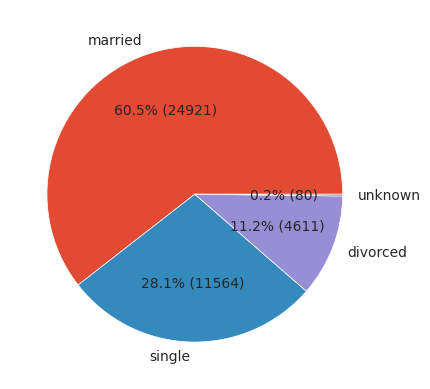

In [ ]:
M = df_bank['marital'].value_counts()
plt.pie(M, labels = M.index, autopct=autopct_format(M))

([<matplotlib.patches.Wedge at 0x7ecfb6ccded0>,
 [Text(-1.050868318871975, 0.3250781081389352, 'no'),
  Text(1.0508682884359613, -0.32507820652832664, 'unknown')],
 [Text(-0.5732009012028954, 0.17731533171214645, '90.45% (4196)'),
  Text(0.5732008846014334, -0.17731538537908723, '9.55% (443)')])

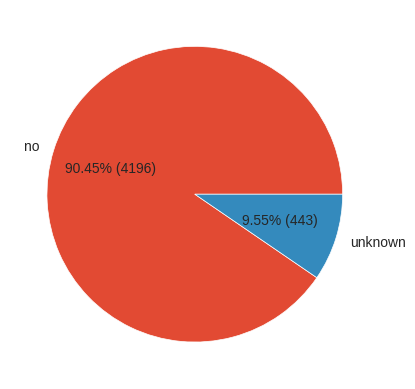

In [ ]:
d = df_bank_subscribed['default'].value_counts()
plt.pie(d, labels = d.index, autopct=autopct_format(d))

([<matplotlib.patches.Wedge at 0x7ecfb733f410>,
 [Text(-0.8716317057385548, 0.6710127938804875, 'no'),
  Text(0.8714781078052098, -0.6712122671824846, 'unknown'),
  Text(1.0999999711949378, -0.00025173624362757543, 'yes')],
 [Text(-0.47543547585739343, 0.3660069784802659, '79.12% (32577)'),
  Text(0.475351695166478, -0.366115782099537, '20.88% (8596)'),
  Text(0.5999999842881477, -0.00013731067834231385, '0.01% (3)')])

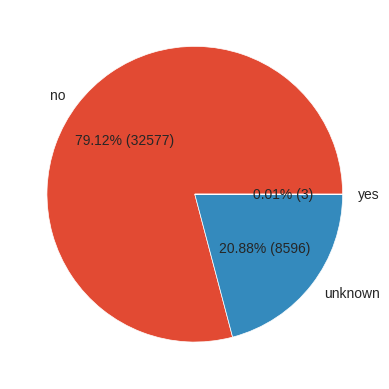

In [ ]:
D = df_bank['default'].value_counts()
plt.pie(D, labels = D.index, autopct=autopct_format(D))

([<matplotlib.patches.Wedge at 0x7ecfb6ad9850>,
 [Text(-0.08242236401391934, 1.0969077235165943, 'yes'),
  Text(-0.0005873487072377029, -1.099999843191578, 'no'),
  Text(1.0968635623072966, -0.08300798565528121, 'unknown')],
 [Text(-0.04495765309850145, 0.5983133037363241, '52.39% (21571)'),
  Text(-0.00032037202212965605, -0.5999999144681334, '45.21% (18615)'),
  Text(0.5982892158039799, -0.045277083084698834, '2.40% (990)')])

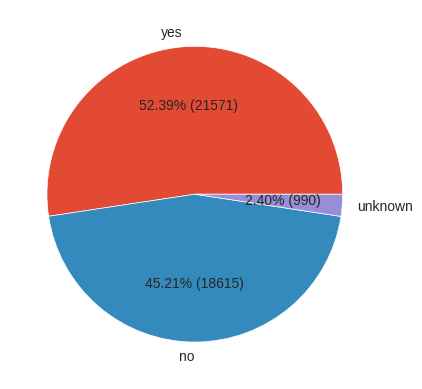

In [ ]:
H = df_bank['housing_loan'].value_counts()
plt.pie(H, labels = H.index, autopct=autopct_format(H))

([<matplotlib.patches.Wedge at 0x7ecfb6621b50>,
 [Text(-0.1393002633846872, 1.0911440952600884, 'yes'),
  Text(0.05993764895092873, -1.0983658216815724, 'no'),
  Text(1.0971133778749365, -0.0796381572353805, 'unknown')],
 [Text(-0.075981961846193, 0.5951695065055027, '54.04% (2507)'),
  Text(0.03269326306414294, -0.5991086300081303, '43.65% (2025)'),
  Text(0.5984254788408744, -0.043438994855662084, '2.31% (107)')])

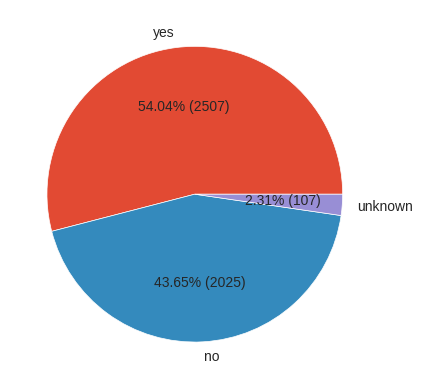

In [ ]:
h = df_bank_subscribed['housing_loan'].value_counts()
plt.pie(h, labels = h.index, autopct=autopct_format(h))

([<matplotlib.patches.Wedge at 0x7ecfb61a0190>,
 [Text(-0.9364893077059764, 0.5770509306399055, 'no'),
  Text(0.8902736860131528, -0.6460748903900804, 'yes'),
  Text(1.0968635467637404, -0.0830081910468362, 'unknown')],
 [Text(-0.5108123496578053, 0.3147550530763121, '82.42% (33938)'),
  Text(0.48560382873444696, -0.3524044856673165, '15.17% (6248)'),
  Text(0.5982892073256765, -0.04527719511645611, '2.40% (990)')])

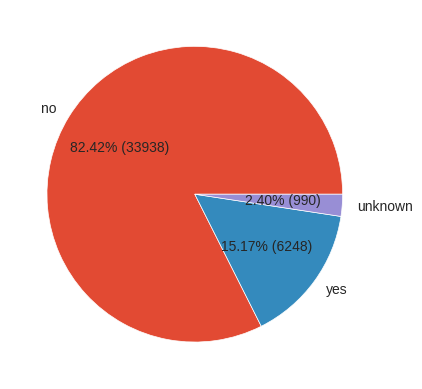

In [ ]:
P = df_bank['personal_loan'].value_counts()
plt.pie(P, labels = P.index, autopct=autopct_format(P))

([<matplotlib.patches.Wedge at 0x7ecfb60cb050>,
 [Text(-0.9462963573017458, 0.5608236836630982, 'no'),
  Text(0.9032103563237646, -0.6278622876312117, 'yes'),
  Text(1.0971133778749365, -0.0796381572353805, 'unknown')],
 [Text(-0.5161616494373158, 0.305903827452599, '82.97% (3849)'),
  Text(0.49266019435841696, -0.3424703387079336, '14.72% (683)'),
  Text(0.5984254788408744, -0.043438994855662084, '2.31% (107)')])

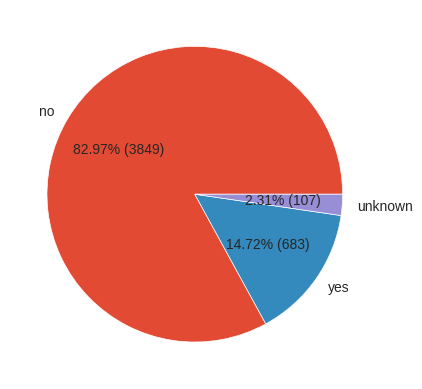

In [ ]:
p = df_bank_subscribed['personal_loan'].value_counts()
plt.pie(p, labels = p.index, autopct=autopct_format(p))

In [ ]:
#df_marital_term_deposit = df_bank.loc[:,['marital','term_deposit_subscription']]
#df_marital_term_deposit.head()

In [ ]:
#df_marital_term_deposit.plot(kind='bar', stacked=True)

In [ ]:
x = 0
y = 0
width = 100
height = 100

job_names = df_bank['job'].value_counts().index
values = df_bank['job'].value_counts().tolist()

normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

colors = ['rgb(200, 255, 144)','rgb(135, 206, 235)',
          'rgb(235, 164, 135)','rgb(220, 208, 255)',
          'rgb(253, 253, 150)','rgb(255, 127, 80)',
         'rgb(218, 156, 133)', 'rgb(245, 92, 76)',
         'rgb(252,64,68)', 'rgb(154,123,91)']

shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append(
        dict(
            type = 'rect',
            x0 = r['x'],
            y0 = r['y'],
            x1 = r['x'] + r['dx'],
            y1 = r['y'] + r['dy'],
            line = dict(width=2),
            fillcolor = colors[counter]
        )
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = job_names[counter]+'<br>'+str(values[counter]),
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(colors):
        counter = 0

# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects],
    y = [ r['y']+(r['dy']/2) for r in rects],
    mode='text',
)

layout = dict(
    #title='Number of Occupations <br> <i>(From our Sample Population)</i>',
    height=700,
    width=700,
    #xaxis=dict(showgrid=False,zeroline=False),
    #yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest'
)

# With hovertext
figure = dict(data=[trace0], layout=layout)

#plt.axis("off")

iplot(figure, filename='squarify-treemap')


import warnings
warnings.filterwarnings('ignore')

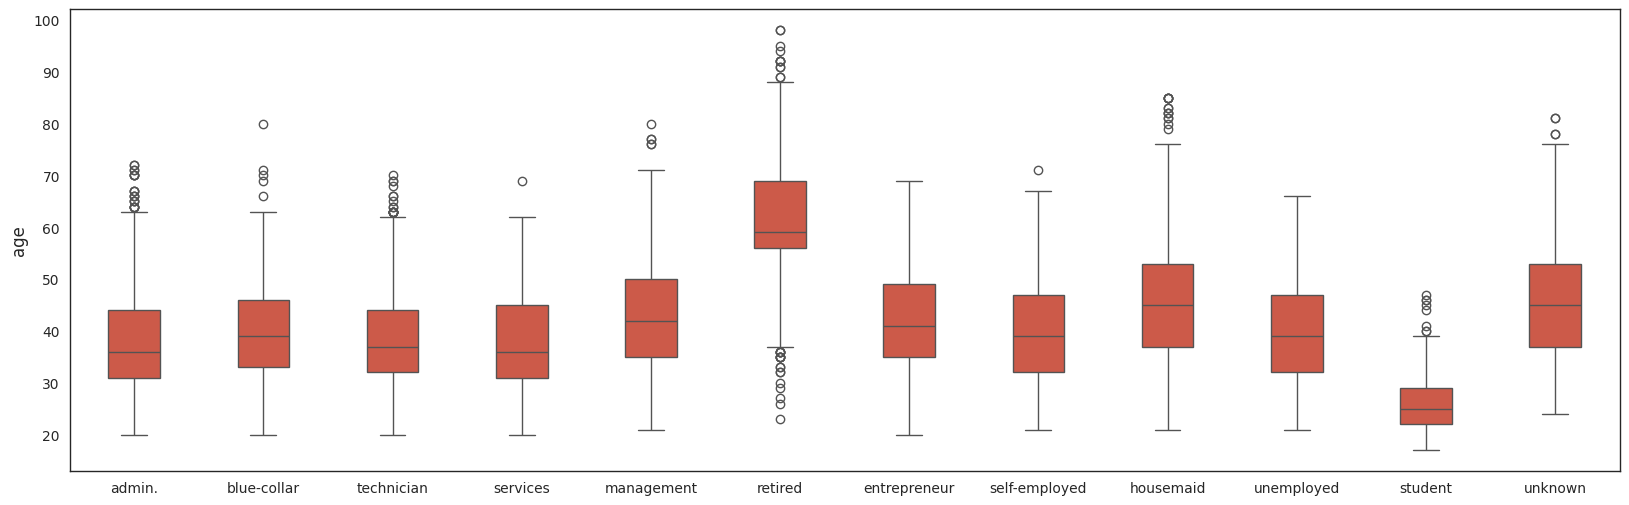

In [ ]:
df = df_bank[['job', 'age']]

# Create the figure and axes with desired size
fig, ax = plt.subplots(figsize=(20, 6))

ax = sns.boxplot(x="job", y="age", data=df,
                 order=['admin.', 'blue-collar', 'technician', 'services',
                        'management', 'retired', #'blended_self_emp',
                        'entrepreneur',
                        'self-employed', #'blended_blue_co',
                        'housemaid',
                        'unemployed','student', 'unknown'],
                 width=0.4)
ax.set(xlabel=None)
plt.show()

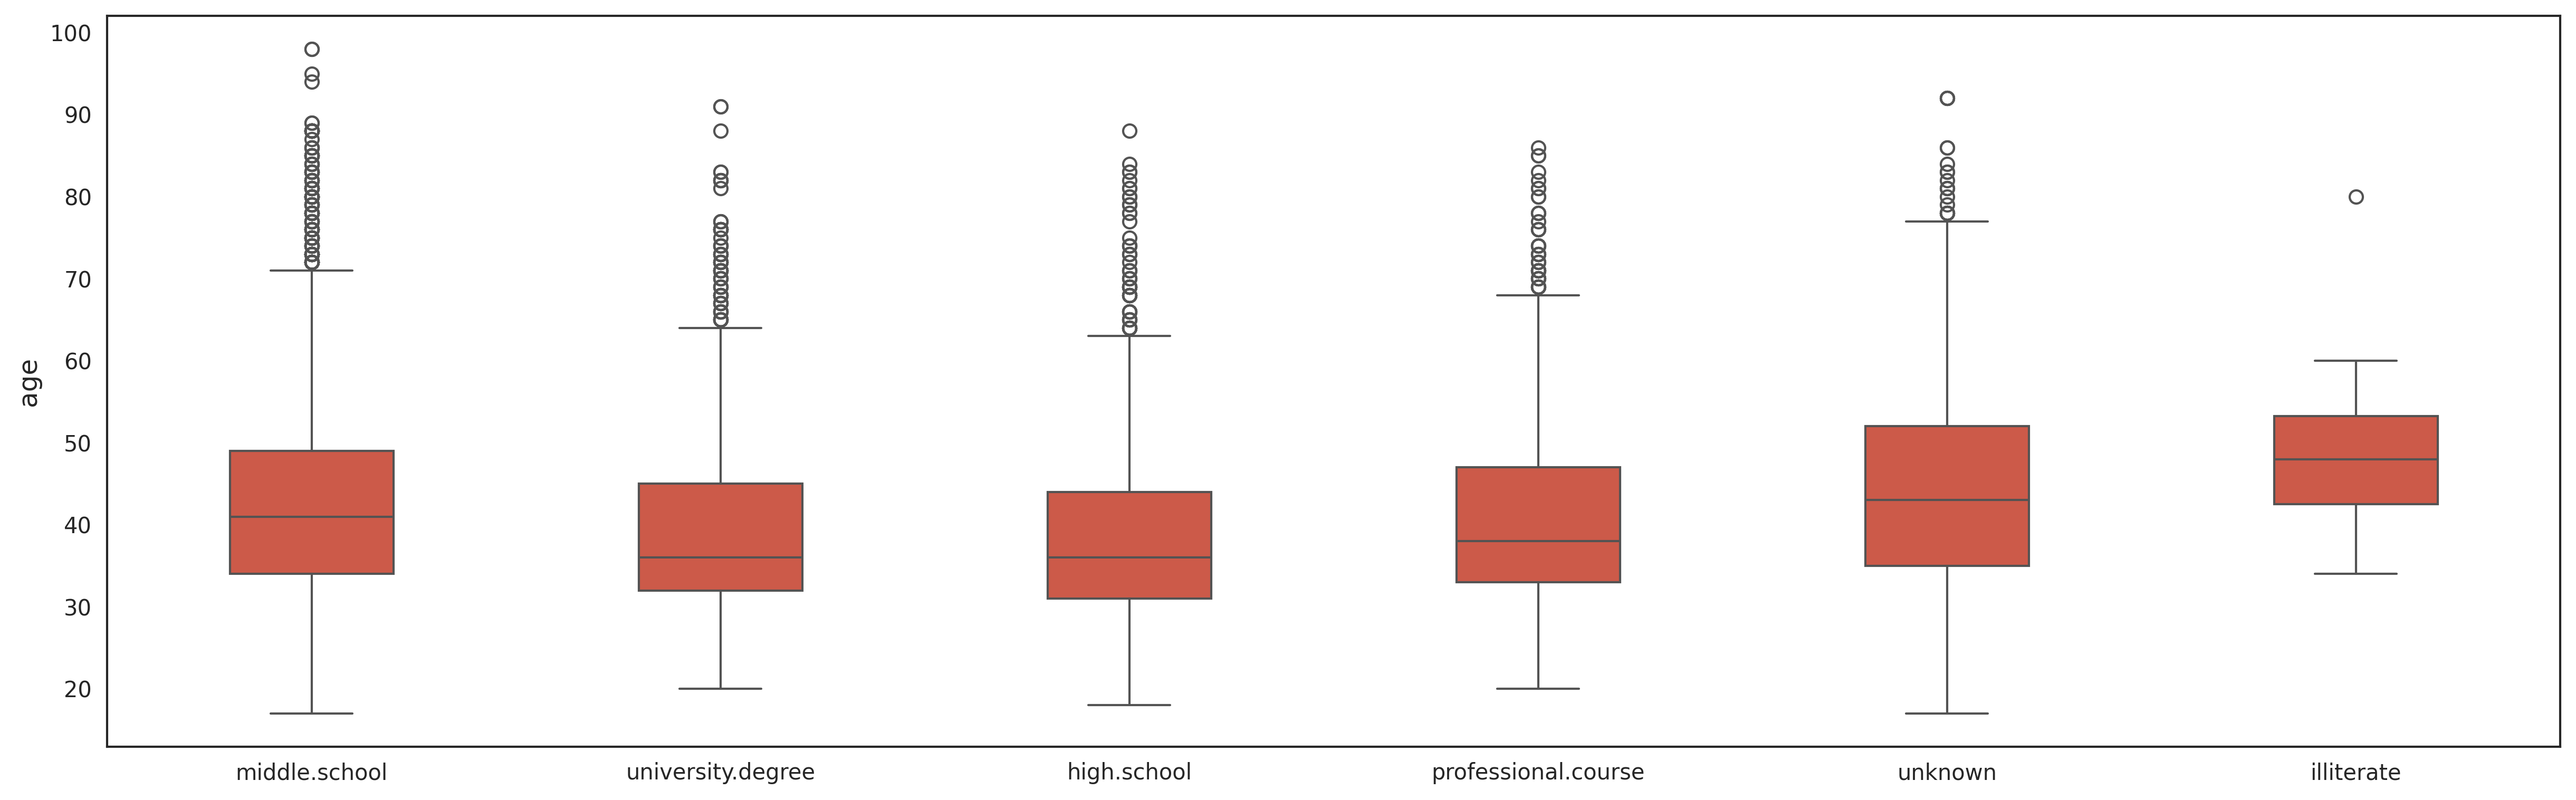

In [ ]:
df_edu = df_bank[['education', 'age']]

# Create the figure and axes with desired size
fig, ax = plt.subplots(figsize=(20, 6))

ax = sns.boxplot(x="education", y="age", data=df_edu,
                 order=['middle.school', 'university.degree', 'high.school', 'professional.course', 'unknown', 'illiterate'],
                 width=0.4)
ax.set(xlabel=None)
plt.show()

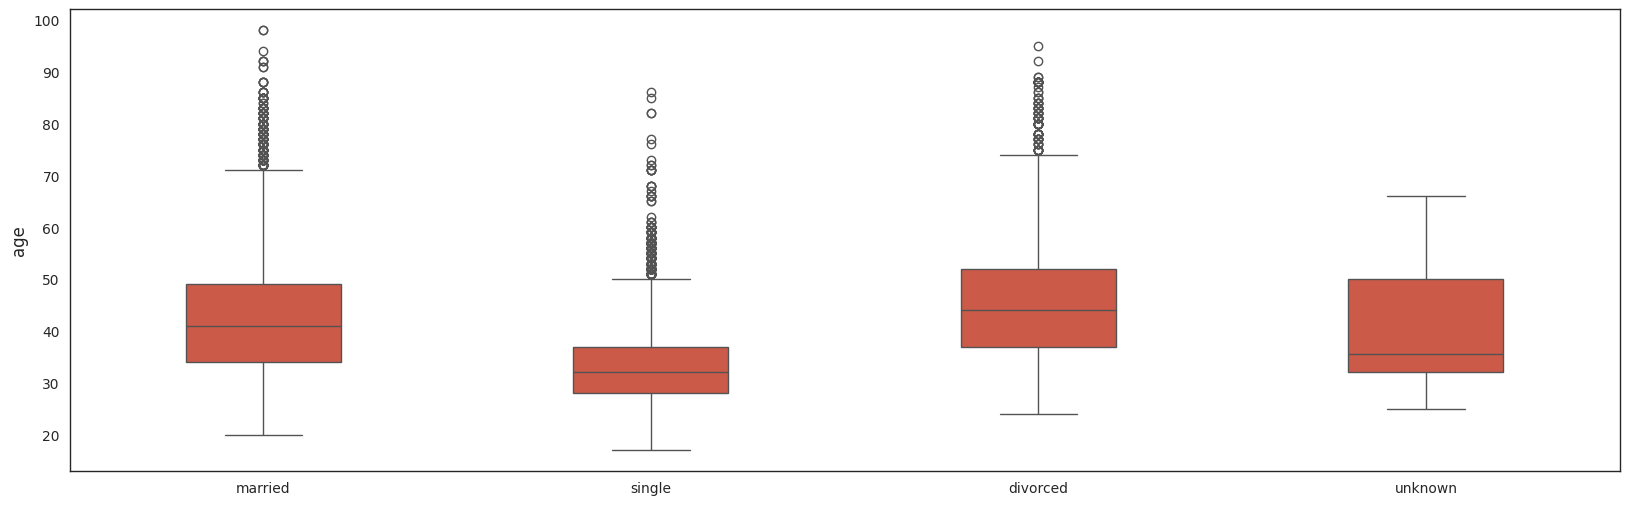

In [ ]:
df_mari = df_bank[['marital', 'age']]

# Create the figure and axes with desired size
fig, ax = plt.subplots(figsize=(20, 6))

ax = sns.boxplot(x="marital", y="age", data=df_mari,
                 order=['married', 'single', 'divorced', 'unknown'],
                 width=0.4)
ax.set(xlabel=None)
plt.show()

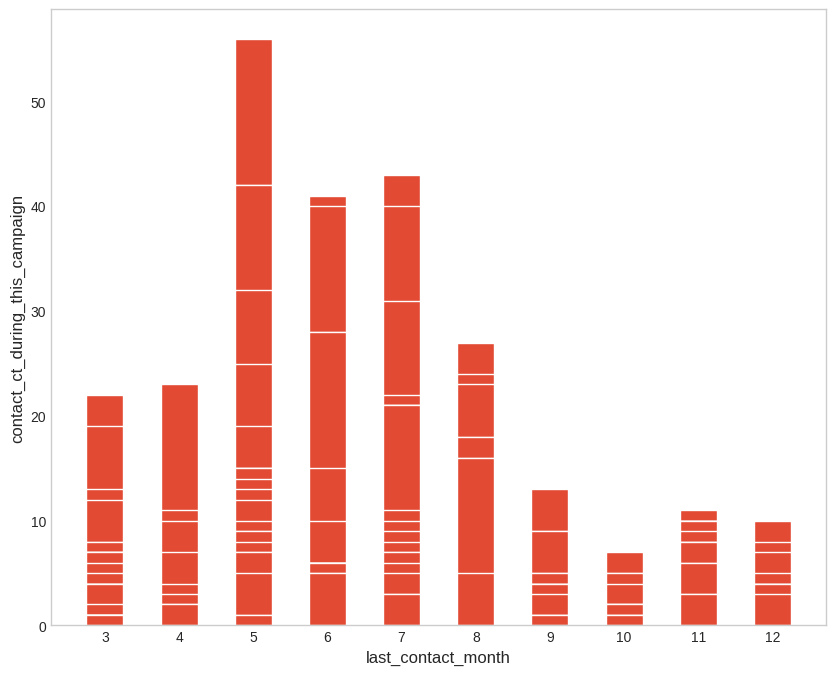

In [ ]:
# Create the figure and axes with desired size
fig, ax = plt.subplots(figsize=(10, 8))

plt.bar(df_bank['last_contact_month'], df_bank['contact_ct_during_this_campaign'], width=0.5, linewidth=1)

plt.xlabel("last_contact_month")
plt.ylabel("contact_ct_during_this_campaign")

# Remove grid lines
plt.grid(False)

# Set x ticks to be all unique values in 'last_contact_month' column
ax.set_xticks(df_bank['last_contact_month'].unique())

# Display the plot
plt.show()

<Axes: >

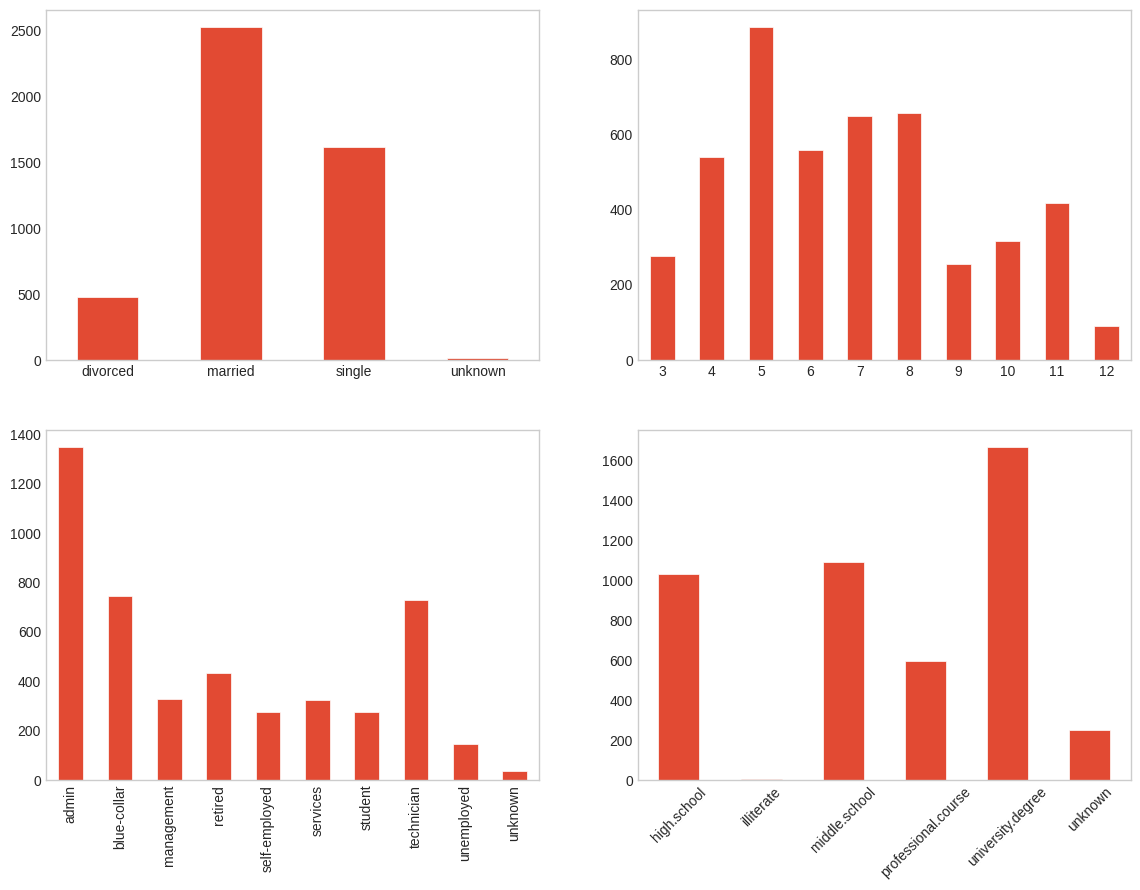

In [ ]:
plt.rcParams["axes.grid"] = False

df1 = pd.crosstab(index = df_bank_subscribed["marital"],columns="count", rownames=[None], colnames=[None])
df2 = pd.crosstab(index = df_bank_subscribed["last_contact_month"],columns="count", rownames=[None], colnames=[None])
df3 = pd.crosstab(index = df_bank_subscribed["job"],columns="count", rownames=[None], colnames=[None])
df4 = pd.crosstab(index = df_bank_subscribed["education"],columns="count", rownames=[None], colnames=[None])


fig, axes = plt.subplots(nrows=2, ncols=2)
df1.plot.bar(ax=axes[0,0], legend=False, figsize=(14,10), rot=0)
df2.plot.bar(ax=axes[0,1], legend=False, figsize=(14,10), rot=0)
df3.plot.bar(ax=axes[1,0], legend=False, figsize=(14,10), rot=90)
df4.plot.bar(ax=axes[1,1], legend=False, figsize=(14,10), rot=45)


<Axes: >

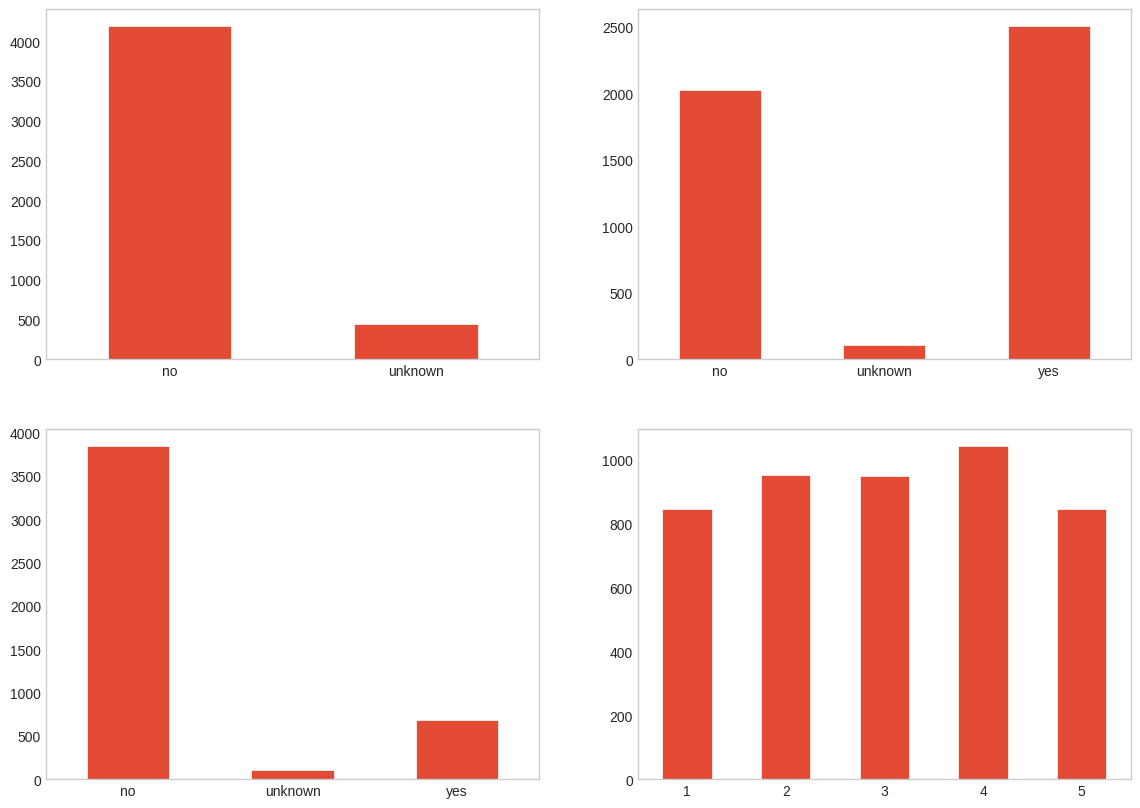

In [ ]:
plt.rcParams["axes.grid"] = False

df5 = pd.crosstab(index = df_bank_subscribed["default"],columns="count", rownames=[None], colnames=[None])
df6 = pd.crosstab(index = df_bank_subscribed["housing_loan"],columns="count", rownames=[None], colnames=[None])
df7 = pd.crosstab(index = df_bank_subscribed["personal_loan"],columns="count", rownames=[None], colnames=[None])
df8 = pd.crosstab(index = df_bank_subscribed["last_contact_day"],columns="count", rownames=[None], colnames=[None])


fig, axes = plt.subplots(nrows=2, ncols=2)
df5.plot.bar(ax=axes[0,0], legend=False, figsize=(14,10), rot=0)
df6.plot.bar(ax=axes[0,1], legend=False, figsize=(14,10), rot=0)
df7.plot.bar(ax=axes[1,0], legend=False, figsize=(14,10), rot=0)
df8.plot.bar(ax=axes[1,1], legend=False, figsize=(14,10), rot=0)


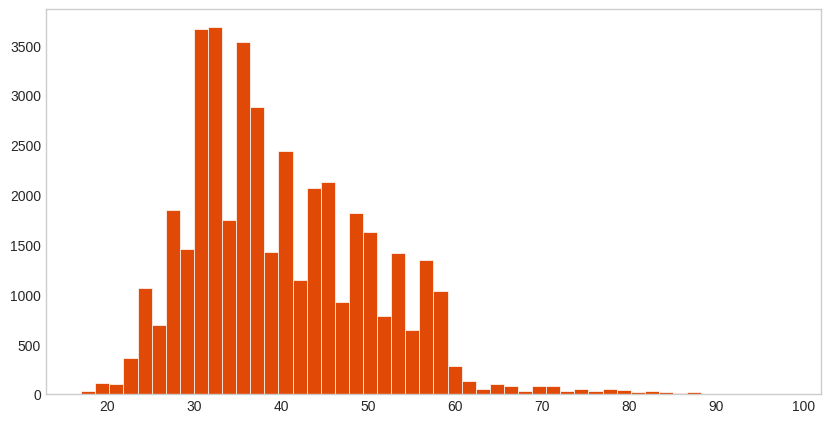

In [ ]:
df_bank['age'].hist(bins=50, figsize=(10,5), color='#E14906')
# Remove grid lines
plt.grid(False)

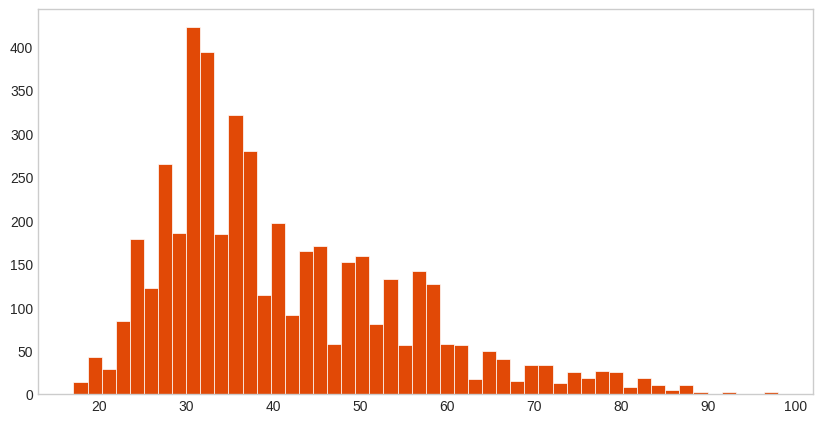

In [ ]:
df_bank_subscribed['age'].hist(bins=50, figsize=(10,5), color='#E14906')
# Remove grid lines
plt.grid(False)

In [ ]:
# Have a grasp of how our data looks.
#df_bank.head()

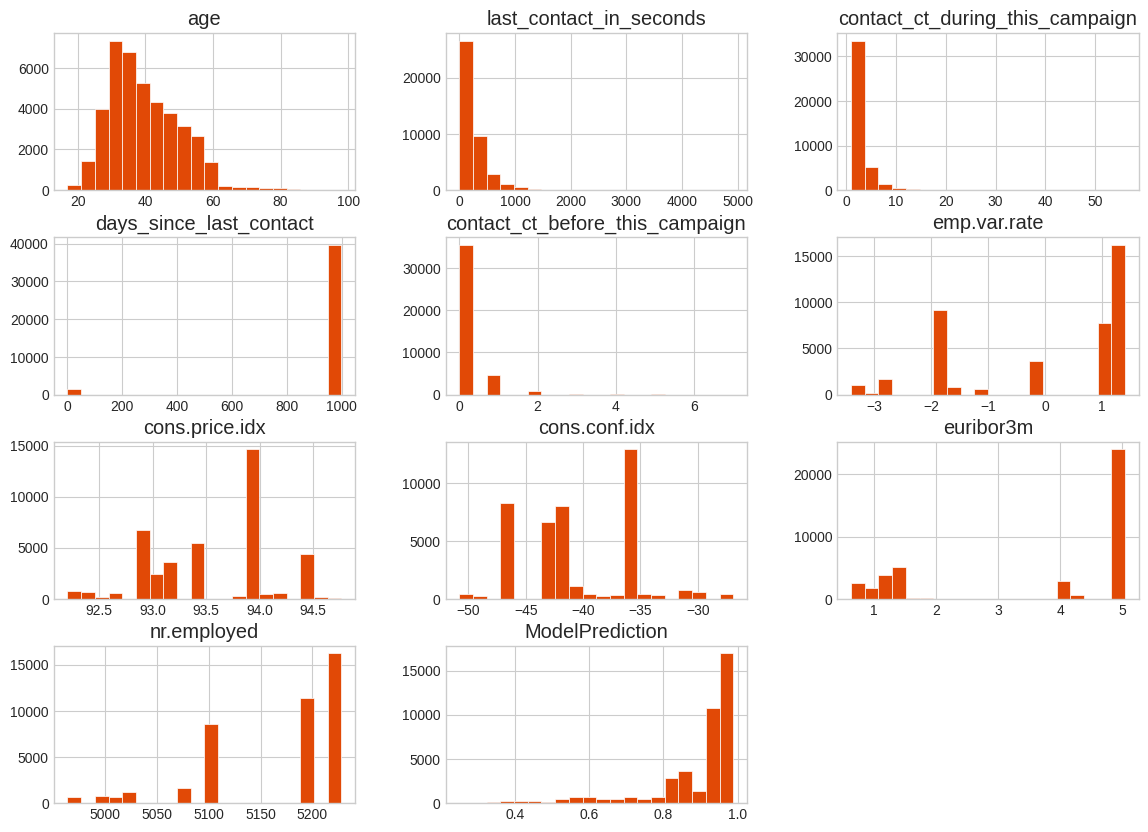

In [ ]:
# Let's see how the numeric data is distributed.
plt.style.use('seaborn-v0_8-whitegrid')

df_bank.hist(bins=20, figsize=(14,10), color='#E14906')

# Remove grid lines
plt.grid(False)

plt.show()

Text(0.5, 1.0, 'no_of_employees_quarterly')

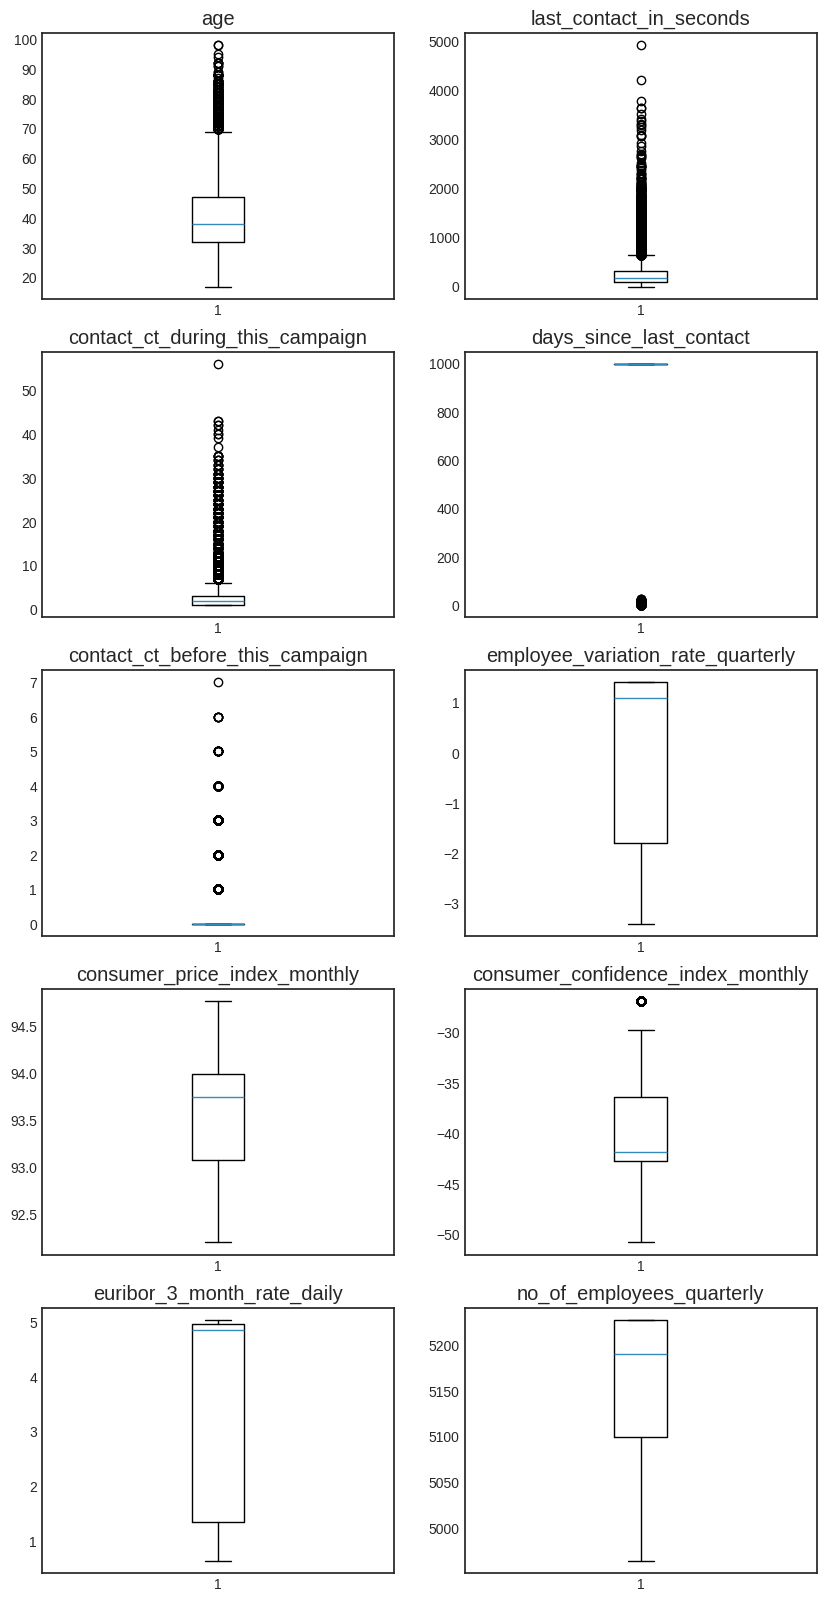

In [ ]:
plt.figure(figsize = (10, 20))
plt.style.use('seaborn-v0_8-white')
ax=plt.subplot(521)
plt.boxplot(df_bank['age'])
ax.set_title('age')
ax=plt.subplot(522)
plt.boxplot(df_bank['last_contact_in_seconds'])
ax.set_title('last_contact_in_seconds')
ax=plt.subplot(523)
plt.boxplot(df_bank['contact_ct_during_this_campaign'])
ax.set_title('contact_ct_during_this_campaign')
ax=plt.subplot(524)
plt.boxplot(df_bank['days_since_last_contact'])
ax.set_title('days_since_last_contact')
ax=plt.subplot(525)
plt.boxplot(df_bank['contact_ct_before_this_campaign'])
ax.set_title('contact_ct_before_this_campaign')
ax=plt.subplot(526)
plt.boxplot(df_bank['emp.var.rate'])
ax.set_title('employee_variation_rate_quarterly')
ax=plt.subplot(527)
plt.boxplot(df_bank['cons.price.idx'])
ax.set_title('consumer_price_index_monthly')
ax=plt.subplot(528)
plt.boxplot(df_bank['cons.conf.idx'])
ax.set_title('consumer_confidence_index_monthly')
ax=plt.subplot(529)
plt.boxplot(df_bank['euribor3m'])
ax.set_title('euribor_3_month_rate_daily')
ax=plt.subplot(5,2,10)
plt.boxplot(df_bank['nr.employed'])
ax.set_title('no_of_employees_quarterly')

We see that many features doesn't have much outliers except for age,duration and campaign. So, let's fix only those features using IQR method.

In [ ]:
df_bank.loc[df_bank['days_since_last_contact'] == 999, 'days_since_last_contact'] = 0

In [ ]:
numerical_features=['age','contact_ct_during_this_campaign','last_contact_in_seconds']
for cols in numerical_features:
    Q1 = df_bank[cols].quantile(0.25)
    Q3 = df_bank[cols].quantile(0.75)
    IQR = Q3 - Q1

    filtered = (df_bank[cols] >= Q1 - 1.5 * IQR) & (df_bank[cols] <= Q3 + 1.5 *IQR)
    df_bank=df_bank.loc[filtered]

In [ ]:
#df_bank['days_since_last_contact'].value_counts()

In [ ]:
#plt.figure(figsize = (10, 20))
#plt.style.use('seaborn-v0_8-white')
#ax=plt.subplot(521)
#plt.boxplot(df_bank['age'])
#ax.set_title('age')
#ax=plt.subplot(522)
#plt.boxplot(df_bank['last_contact_in_seconds'])
#ax.set_title('last_contact_in_seconds')
#ax=plt.subplot(523)
#plt.boxplot(df_bank['contact_ct_during_this_campaign'])
#ax.set_title('contact_ct_during_this_campaign')

Ordinal Encoding

In [ ]:
month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'mar':3, 'sep':9,'dec':12}
df_bank['last_contact_month']= df_bank['last_contact_month'].map(month_dict)

day_dict={'mon':1,'thu':4,'tue':2,'wed':3,'fri':5}
df_bank['last_contact_day']= df_bank['last_contact_day'].map(day_dict)

Label Encoding

In [ ]:
dictionary_YNU={'yes':1,'no':0,'unknown':-1}
df_bank['default']=df_bank['default'].map(dictionary_YNU)
df_bank['housing_loan']=df_bank['housing_loan'].map(dictionary_YNU)
df_bank['personal_loan']=df_bank['personal_loan'].map(dictionary_YNU)

In [ ]:
dictionary_YN={'yes':1,'no':0}
df_bank['term_deposit_subscription']=df_bank['term_deposit_subscription'].map(dictionary_YN)

In [ ]:
dictionary_SFN={'success':1,'failure':0,'nonexistent':-1}
df_bank['previous_outcome']=df_bank['previous_outcome'].map(dictionary_SFN)

One Hot Encoding

In [ ]:
dummy_contact=pd.get_dummies(df_bank['contact_type'], prefix='dummy',drop_first=True)
df_bank = pd.concat([df_bank,dummy_contact],axis=1)
df_bank.drop(['contact_type'],axis=1, inplace=True)

Frequency Encoding

In [ ]:
bank_job=df_bank['job'].value_counts().to_dict()
bank_edu=df_bank['education'].value_counts().to_dict()
bank_mari=df_bank['marital'].value_counts().to_dict()

In [ ]:
df_bank['job']=df_bank['job'].map(bank_job)
df_bank['education']=df_bank['education'].map(bank_edu)
df_bank['marital']=df_bank['marital'].map(bank_mari)

In [ ]:
df_bank.drop(['employment', 'last_contact_in_minute'],axis=1, inplace=True)

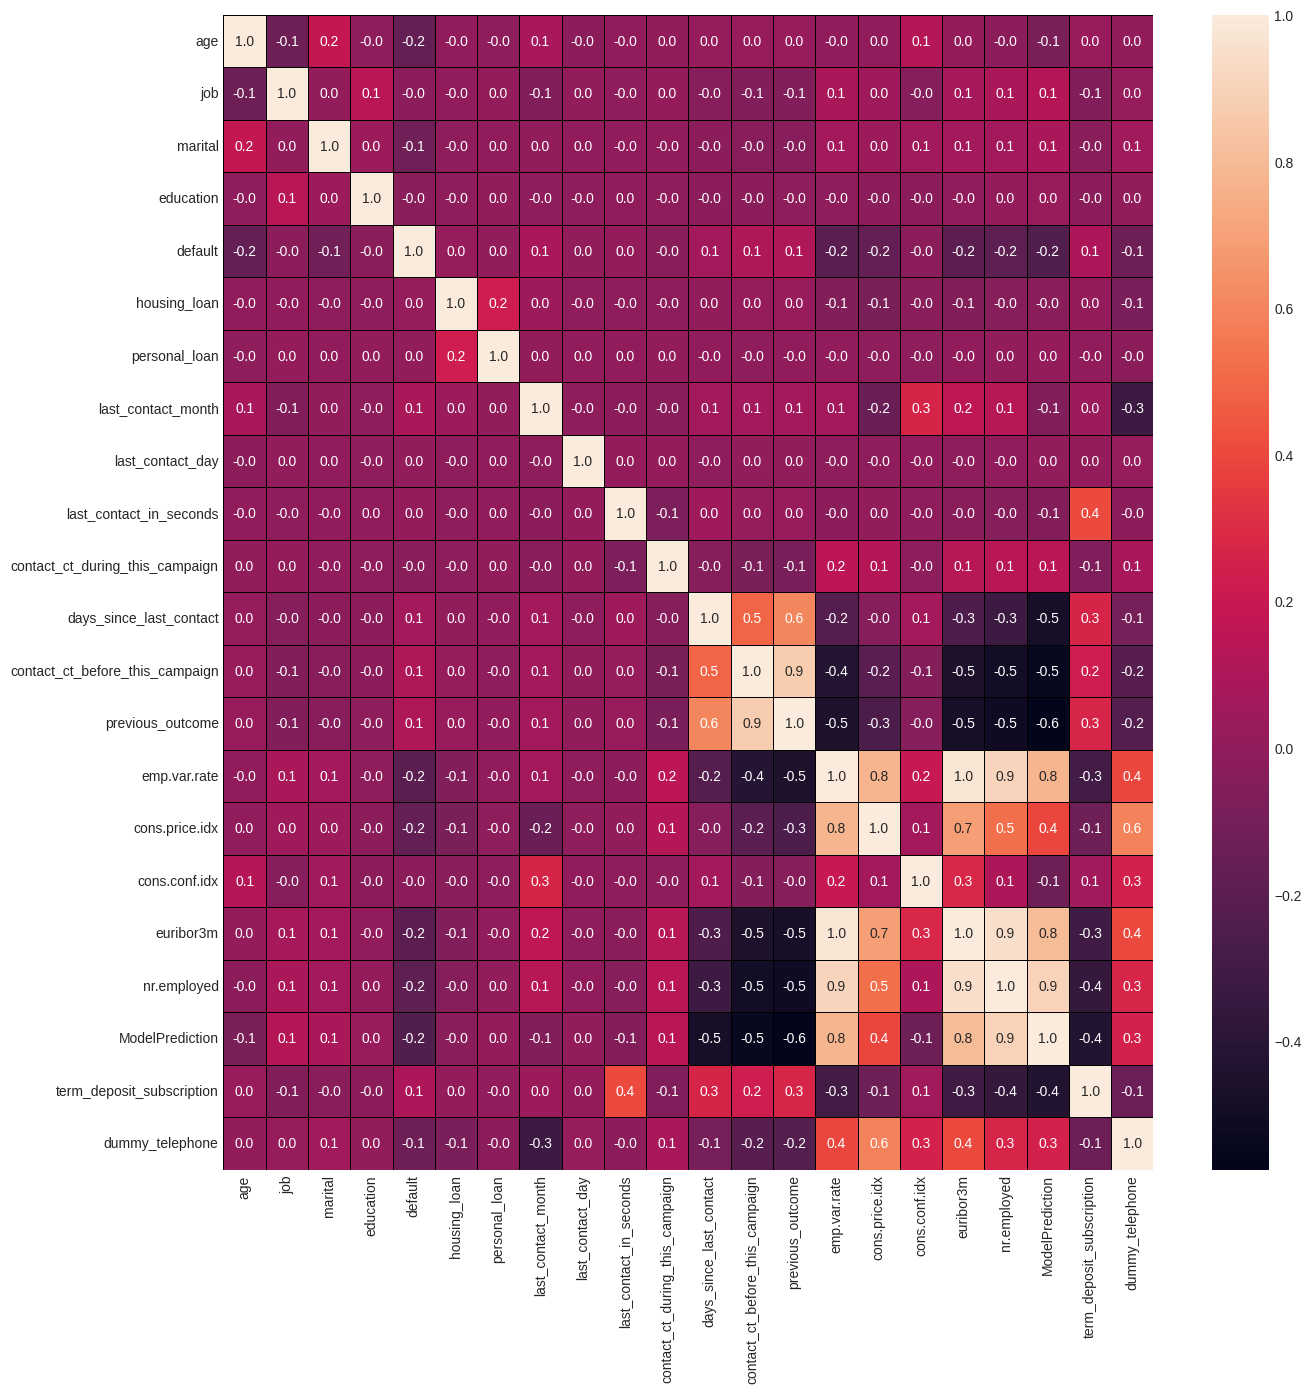

In [ ]:
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(df_bank.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_bank.corr()

# Extract the correlation values between the target variable and other variables
target_correlation = correlation_matrix['term_deposit_subscription'].drop('term_deposit_subscription') #Exclude target variable itself

# Print the correlation values
print(target_correlation)

age                                0.030381
job                               -0.059710
marital                           -0.033817
education                         -0.016477
default                            0.099210
housing_loan                       0.011436
personal_loan                     -0.003151
last_contact_month                 0.037210
last_contact_day                   0.009993
last_contact_in_seconds            0.405297
contact_ct_during_this_campaign   -0.066361
days_since_last_contact            0.267115
contact_ct_before_this_campaign    0.230202
previous_outcome                   0.270399
emp.var.rate                      -0.298289
cons.price.idx                    -0.136134
cons.conf.idx                      0.054802
euribor3m                         -0.307740
nr.employed                       -0.354669
ModelPrediction                   -0.430892
dummy_telephone                   -0.144774
Name: term_deposit_subscription, dtype: float64


<Axes: >

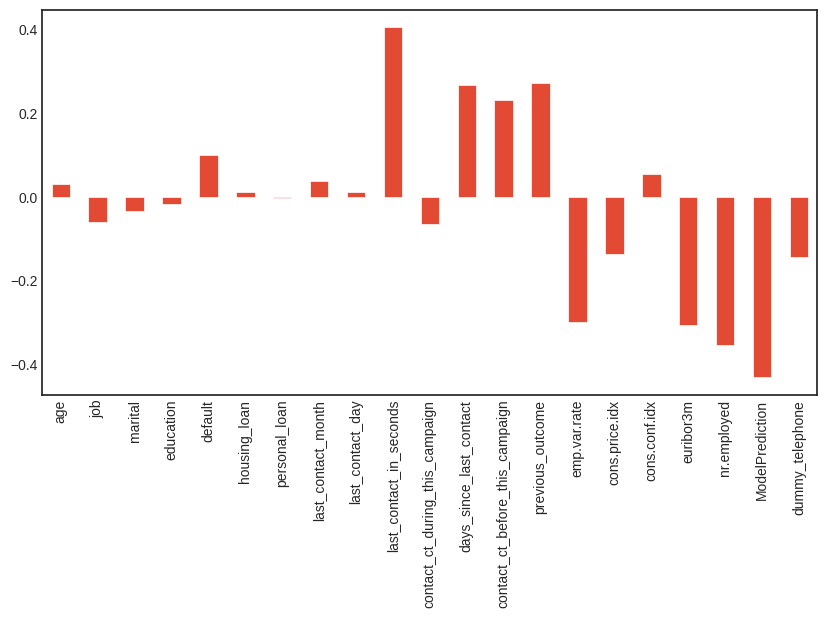

In [ ]:
plt.style.use('seaborn-v0_8-white')
target_correlation.plot(kind='bar',figsize=(10,5))

Standardization

In [ ]:
bank_scale=df_bank.copy()
Categorical_variables=['job', 'education', 'marital', 'default', 'housing_loan',
                       'personal_loan', 'previous_outcome', 'last_contact_month',
                       'last_contact_day','term_deposit_subscription', 'dummy_telephone']


feature_scale=[feature for feature in bank_scale.columns if feature not in Categorical_variables]


scaler=StandardScaler()
scaler.fit(bank_scale[feature_scale])

StandardScaler()

In [ ]:
scaled_data = pd.concat([bank_scale[[
    'job', 'education', 'marital', 'default', 'housing_loan', 'personal_loan',
    'previous_outcome', 'last_contact_month', 'last_contact_day','term_deposit_subscription', 'dummy_telephone'
       ]].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(bank_scale[feature_scale]), columns=feature_scale)],
                    axis=1)
scaled_data.head()

,job,education,marital,default,housing_loan,personal_loan,previous_outcome,last_contact_month,last_contact_day,term_deposit_subscription,...,last_contact_in_seconds,contact_ct_during_this_campaign,days_since_last_contact,contact_ct_before_this_campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction
0,8976,10687,21499,0,0,0,-1,5,2,0,...,0.383301,-0.81312,-0.161027,-0.354707,0.660585,0.741184,0.891953,0.720755,0.340065,0.366294
1,3454,8284,21499,-1,0,0,-1,5,2,0,...,-0.413667,-0.81312,-0.161027,-0.354707,0.660585,0.741184,0.891953,0.720755,0.340065,0.536804
2,3454,8284,21499,0,1,0,-1,5,2,0,...,0.134248,-0.81312,-0.161027,-0.354707,0.660585,0.741184,0.891953,0.720755,0.340065,0.472500
3,9107,10687,21499,0,0,0,-1,5,2,0,...,-0.399435,-0.81312,-0.161027,-0.354707,0.660585,0.741184,0.891953,0.720755,0.340065,0.375498
4,3454,8284,21499,0,0,1,-1,5,2,0,...,0.710627,-0.81312,-0.161027,-0.354707,0.660585,0.741184,0.891953,0.720755,0.340065,0.433796


Feature Selection

In [ ]:
X=scaled_data.drop(['term_deposit_subscription'],axis=1)
y=scaled_data.term_deposit_subscription

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

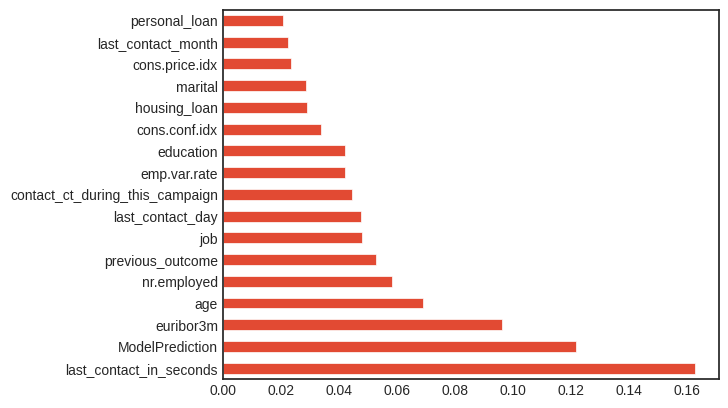

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

Train and Test Split (80:20)

In [ ]:
X=scaled_data.drop(['days_since_last_contact','last_contact_day','cons.price.idx','personal_loan','housing_loan','emp.var.rate', 'ModelPrediction', 'term_deposit_subscription'],axis=1)
y=scaled_data.term_deposit_subscription

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (28440, 14)
Input Test: (7110, 14)
Output Training: (28440,)
Output Test: (7110,)


Model Selection

In [ ]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.8819127988748241
Decision Tree Test Accuracy: 0.6713642756680731
KNN Test Accuracy: 0.8593248945147678
SVC Test Accuracy: 0.91887482419128
Naive Bayes Test Accuracy: 0.8168776371308016


Logistic regression with Hyperparameter tuning

In [ ]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=0.5689866029018293, random_state=0)
The mean accuracy of the model is: 0.9286919831223629


In [ ]:
logreg = LogisticRegression(C=0.5689866029018293, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[6394  127]
 [ 380  209]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      6521
           1       0.62      0.35      0.45       589

    accuracy                           0.93      7110
   macro avg       0.78      0.67      0.71      7110
weighted avg       0.92      0.93      0.92      7110



Insights:

The Confusion matrix result is telling us that we have 6394+209 correct predictions and 380+127 incorrect predictions.
The Classification report reveals that we have 94% precision which means the accuracy that the model classifier not to label an instance positive that is actually negative which is important as we shouldn't label a lead as positive in making a term deposit when he/she isn't interested in making a deposit

ROC Curve

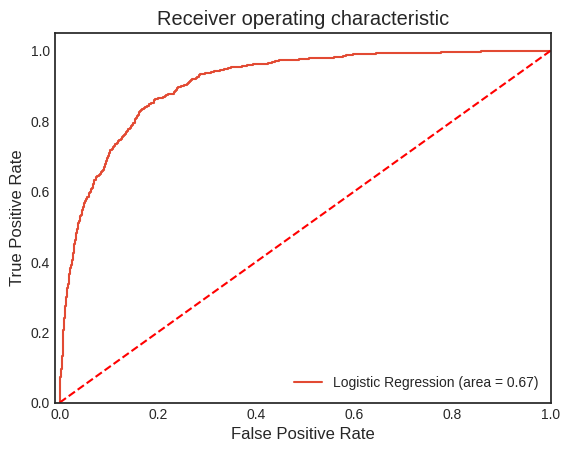

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

From the ROC curve we can infer that our logistic model has classified the prospective leads who made deposit correctly rather than predicting false positive. The more the ROC curve(red) lies towards the top left side the better our model is. We can choose any value between 0.8 to 0.9 for the threshold value which can reap us true positive results

Support vector classifier

In [ ]:
svc_classifier = SVC(random_state = 0)
svc_classifier.fit(X_train,y_train)
y_pred=svc_classifier.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.9171589310829817
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      6521
           1       0.00      0.00      0.00       589

    accuracy                           0.92      7110
   macro avg       0.46      0.50      0.48      7110
weighted avg       0.84      0.92      0.88      7110

